In [1]:
# reload P1_definitions module before executing code. All the object imported from P1_definitions are updated.
%load_ext autoreload
%autoreload 2

In [2]:
# Importing various packages
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
from random import random, seed

# For Define the model and preprocess and scale
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Our code for GD, SGD, Adagrad, RMSProp and ADAM 
from P1_definitions import *

# Tables of MSEs
from prettytable import PrettyTable
from prettytable import SINGLE_BORDER
import seaborn as sns

************ Run the following 5 code boxes to define the problem, create the dataset, preprocess and scale the data. ************

In [3]:
""" Problem definition and sample generation  """

# Training data 
# Number of datapoints
n = 1000
upper_limit = 3.0
lower_limit = -3.0
np.random.seed(42)
x = (upper_limit - lower_limit)*np.random.rand(n,1) + lower_limit 
#y_train = -18 + 9*x + 20* x**2 -10 * x**3 - 2* x**4 + x**5 + np.random.randn(n,1)
y_train = -6 - 11 *x + 3* x**2 +2 * x**3 + np.random.randn(n,1)

# Test data
n_test = 430 
x_test = np.linspace(-3 ,3 , n_test).reshape(n_test,1)
#y_test = -18 + 9*x_test + 20*x_test**2 -10 *x_test**3 - 2*x_test**4 +x_test**5 + np.random.randn(n_test,1)
y_test = -6 - 11*x_test + 3* x_test**2 +2 * x_test**3+ np.random.randn(n_test,1)


In [4]:
""" Definition of the polynomial model """

# Model complexity (degree of the polynomial)
degree = 5                             
poly = PolynomialFeatures(degree) 
# training design matrix            
X_train = poly.fit_transform(x) 
# test design matrix
X_test = poly.fit_transform(x_test)

# number of features in the model                  
n_features = X_train.shape[1]

In [5]:
""" Scaling of the data: standardizing the input (x) but not the output (y) """

# Standardizing (scaling) = zero mean and unit standard deviation (for each feature)--> scaled_xi = (xi - mean(x))/standarddeviation(x). 
# 2 options: 1)keep the intercept column to 1 and not scale the input y || 2) delete the intercept column and scale the input y

# The scaler is fit using the train set. The fit scaler is used to transform train and test sets
# 1)keep the intercept column to 1 and not scale the input y
scaler_x = StandardScaler(with_mean=True, with_std=True)
scaler_x.fit(X_train)
scaled_X_train = scaler_x.transform(X_train)
scaled_X_test = scaler_x.transform(X_test)
# 1)keep the intercept
scaled_X_train[:,0] = np.ones((X_train.shape[0],1)).ravel()
scaled_X_test[:,0] = np.ones((X_test.shape[0],1)).ravel()

# 2)delete the intercept column and scale the input y
#scaler_y = StandardScaler(with_mean=True, with_std=True)
#scaler_y.fit(y)
#scaled_X = scaled_X[:,1:X.shape[1]]
#scaled_X_test[:,0] = scaled_X[:,1:X_test.shape[1]]
#scaled_y = scaler_y.transform(y)
#scaled_y_test = scaler_y.transform(ynew)

In [6]:
""" Linear Regression analysis: computing beta, y predict and, MSE tain and test"""

# Not scaled data
OLS_beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
OLS_ytilde = X_train.dot(OLS_beta)
OLS_ypredict = X_test.dot(OLS_beta)
OLS_MSE_train = np.mean((y_train - OLS_ytilde)**2) #, axis=0, keepdims=True)
OLS_MSE_test = np.mean((y_test - OLS_ypredict)**2) #, axis=0, keepdims=True)

# Scaled data
scaled_OLS_beta = np.linalg.inv(scaled_X_train.T @ scaled_X_train) @ scaled_X_train.T @ y_train
scaled_OLS_ytilde = scaled_X_train.dot(scaled_OLS_beta)
scaled_OLS_ypredict = scaled_X_test.dot(scaled_OLS_beta)
scaled_OLS_MSE_train = np.mean((y_train - scaled_OLS_ytilde)**2) #, axis=0, keepdims=True)
scaled_OLS_MSE_test = np.mean((y_test - scaled_OLS_ypredict)**2) #, axis=0, keepdims=True)

In [7]:
""" Computing Hessian matrix: usefull to approximate the (what should be) best learning rate with GD """

# Hessian matrix (to compute an approximation of the best learning rate with GD)
H = (2.0/n)* X_train.T @ X_train
EigValues, EigVectors = np.linalg.eig(H)         
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

# Scaled case: Hessian matrix (to compute an approximation of the best learning rate with GD)
scaled_H = (2.0/n)* scaled_X_train.T @ scaled_X_train
scaled_EigValues, scaled_EigVectors = np.linalg.eig(scaled_H)           
print(f"Eigenvalues of Scaled Hessian Matrix:{scaled_EigValues}")

Eigenvalues of Hessian Matrix:[1.09301546e+04 1.50384741e+03 1.15016854e+01 3.29107661e+00
 4.23256035e-01 2.63819368e-01]
Eigenvalues of Scaled Hessian Matrix:[2.         5.65834311 3.90296215 0.34861587 0.08047791 0.00960096]


Short legend:                                   $\\$

GD_ = Gradient Descent                          $\\$
GDmom_ = Gradient Descent with momentum         $\\$
SGD_ = Stochastic Gradient Descent              $\\$
AG_ = AdaGrad                                   $\\$
RMSP_ = RMSProp                                 $\\$
ADAM_ = ADAM                                    $\\$ 
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-. $\\$
_MSE_ = Mean squared error                       $\\$
_MSE_mean_ = mean of the mean squared error (with bootstrap technique) $\\$
R2_ = R-squared                                 $\\$
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-. $\\$
_Bs_ = Bootstrap                                 $\\$
_Cs_ = Cross-validation                          $\\$
c_dp_ = complexity and number of data points     $\\$
c_rt_ = complexity and regularization term       $\\$
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-. $\\$
_ytilde = training data predicted by the model  $\\$
_ypredict = test data predicted by the model    $\\$

************************************************* GRADIENT DESCENT *************************************************

1) OLS

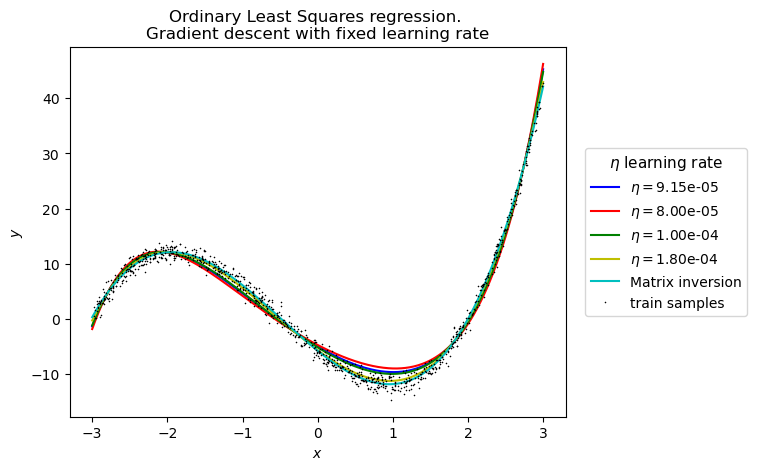

learning rate = 1.77e-01 --> iteration number 12632 with norm 2 of the gradient of the loss function = 9.999e-11
learning rate = 6.00e-02 --> iteration number 37333 with norm 2 of the gradient of the loss function = 9.999e-11
learning rate = 8.00e-02 --> iteration number 27922 with norm 2 of the gradient of the loss function = 9.996e-11
learning rate = 1.00e-01 --> iteration number 22308 with norm 2 of the gradient of the loss function = 9.990e-11


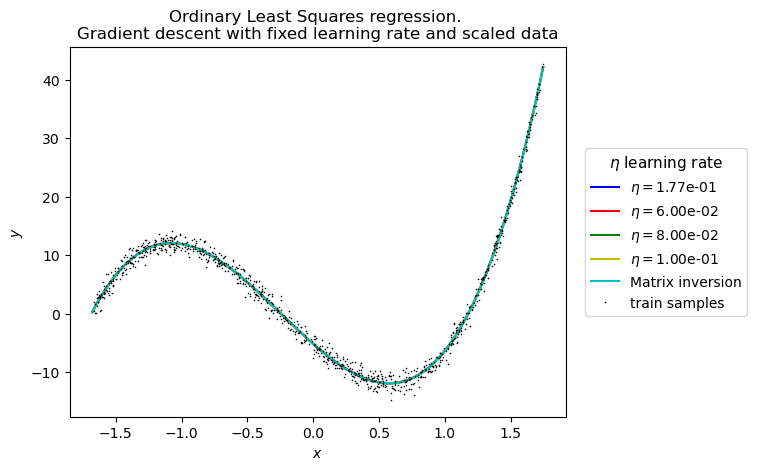

In [8]:
""" OLS: Gradient Descent with fixed learning rate and fixed polynomial degree """

# Setting the hyperparameters
# The first eta that we consider should be "the best" one, i.e. the one computing with the Hessian matrix
GD_Niterations = 50000
lmb = 0.0    # hyperparameter for Ridge regression
tol = 1.0e-10
# Not scaled data hyperparameters
GD_eta_best = 1.0/EigValues.max()      # Approximation of the best learning rate                     
GD_etas = np.array([GD_eta_best, 0.00008, 0.0001, 0.00018,]) 
# Scaled data hyperparameters
scaled_GD_eta_best = 1.0/scaled_EigValues.max()    # Approximation of the best learning rate for the scaled data        
scaled_GD_etas = np.array([scaled_GD_eta_best, 0.06, 0.08, 0.1])     

# Not scaled data case:
# Computing the betas
GD_betas = GD(X_train, y_train, n, n_features, GD_Niterations, GD_etas, lmb, tol)
# Prediction and MSE and R-squared computation
GD_ytilde = X_train @ GD_betas
GD_MSE_train = MSE_function(y_train, GD_ytilde, 'vector')
GD_ypredict = X_test @ GD_betas
GD_MSE_test = MSE_function(y_test, GD_ypredict, 'vector')
# Plot
plt.figure(1)
color = np.array((['b-', 'r-' , 'g-', 'y-', 'm-']))
for i in range(len(GD_etas)):
    plt.plot(x_test, GD_ypredict[:,i], color[i],label=r'$\eta = ${:.2e}'.format(GD_etas[i]))
plt.plot(x_test, OLS_ypredict, "c-", label='Matrix inversion')
plt.plot(x, y_train ,"kx", markersize=0.5, label='train samples')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Ordinary Least Squares regression. \n' + 'Gradient descent with fixed learning rate')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title_fontsize = 11, title=r'$\eta$ learning rate')
plt.show()


# Scaled case:
# Computing the betas
scaled_GD_betas = GD(scaled_X_train, y_train, n, n_features, GD_Niterations, scaled_GD_etas, lmb, tol)
# Prediction and MSE computation
scaled_GD_ytilde = scaled_X_train @ scaled_GD_betas
scaled_GD_MSE_train = MSE_function(y_train, scaled_GD_ytilde, 'vector') 
scaled_GD_ypredict = scaled_X_test @ scaled_GD_betas
scaled_GD_MSE_test = MSE_function(y_test, scaled_GD_ypredict, 'vector') 
# Plot
plt.figure(2)
color = np.array((['b-', 'r-' , 'g-', 'y-', 'm-']))
for i in range(len(scaled_GD_etas)):
    plt.plot(scaled_X_test[:,1], scaled_GD_ypredict[:,i], color[i],label=r'$\eta = ${:.2e}'.format(scaled_GD_etas[i]))
plt.plot(scaled_X_test[:,1], scaled_OLS_ypredict, "c-", label='Matrix inversion')
plt.plot(scaled_X_train[:,1], y_train ,"kx", markersize=0.5, label='train samples')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Ordinary Least Squares regression. \n' + 'Gradient descent with fixed learning rate and scaled data')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title_fontsize = 11, title=r'$\eta$ learning rate')
plt.show()


In [9]:
""" OLS: Plotting the MSE train and test of the GRADIENT DESCENT """

print('Gradient Descent technique')
# Not scaled 
GD_table = PrettyTable()
GD_table.title = 'OLS: NOT SCALED DATA'
GD_table.field_names = ['Learning rate', 'MSE train', 'MSE test']
for i, eta in enumerate(GD_etas):
    GD_table.add_row(['{:.2e}'.format(eta), GD_MSE_train[i], GD_MSE_test[i]])
GD_table.add_row(['Matrix inversion', OLS_MSE_train, OLS_MSE_test], divider = True)
GD_table.set_style(SINGLE_BORDER)
print(GD_table)


# Scaled data
scaled_GD_table = PrettyTable()
scaled_GD_table.title = 'OLS: SCALED DATA'
scaled_GD_table.field_names = ['Learning rate', 'MSE train', 'MSE test']
for i, eta in enumerate(scaled_GD_etas):
    scaled_GD_table.add_row(['{:.2e}'.format(eta), scaled_GD_MSE_train[i], scaled_GD_MSE_test[i]])
scaled_GD_table.add_row(['Matrix inversion', scaled_OLS_MSE_train, scaled_OLS_MSE_test])
scaled_GD_table.set_style(SINGLE_BORDER)
print(scaled_GD_table)


Gradient Descent technique
┌────────────────────────────────────────────────────────────┐
│                    OLS: NOT SCALED DATA                    │
├──────────────────┬────────────────────┬────────────────────┤
│  Learning rate   │     MSE train      │      MSE test      │
├──────────────────┼────────────────────┼────────────────────┤
│     9.15e-05     │ 2.499012770459862  │ 2.7307320326264333 │
│     8.00e-05     │ 3.575401622643642  │ 3.887853425391884  │
│     1.00e-04     │ 2.0836058317146633 │ 2.2737763569554503 │
│     1.80e-04     │ 1.090096531852156  │ 1.1441761491944857 │
│ Matrix inversion │ 0.9691605648762931 │ 0.9785492495158253 │
└──────────────────┴────────────────────┴────────────────────┘
┌────────────────────────────────────────────────────────────┐
│                      OLS: SCALED DATA                      │
├──────────────────┬────────────────────┬────────────────────┤
│  Learning rate   │     MSE train      │      MSE test      │
├──────────────────┼────────

2) RIDGE

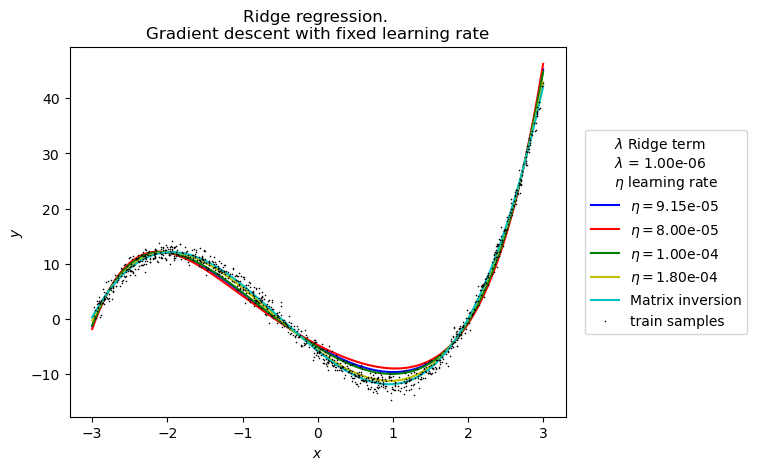

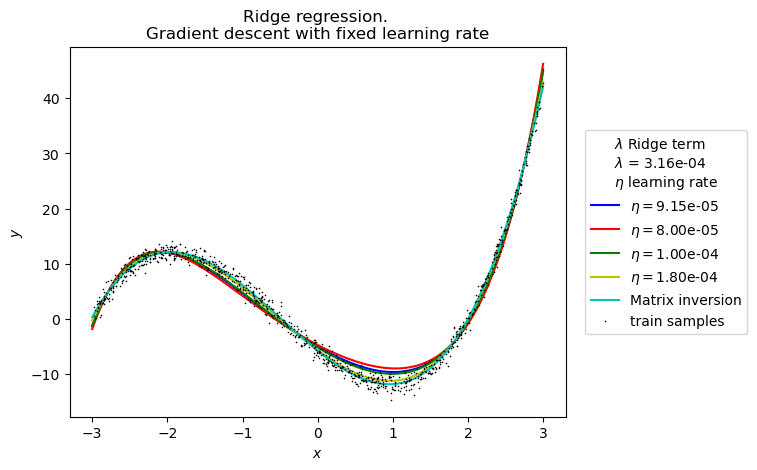

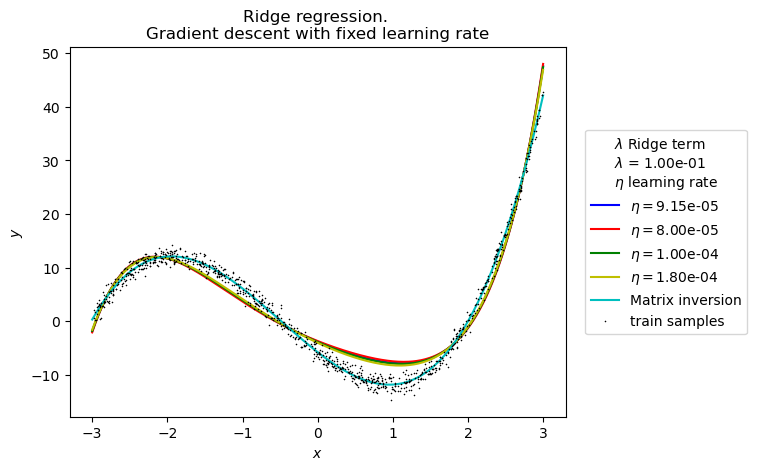

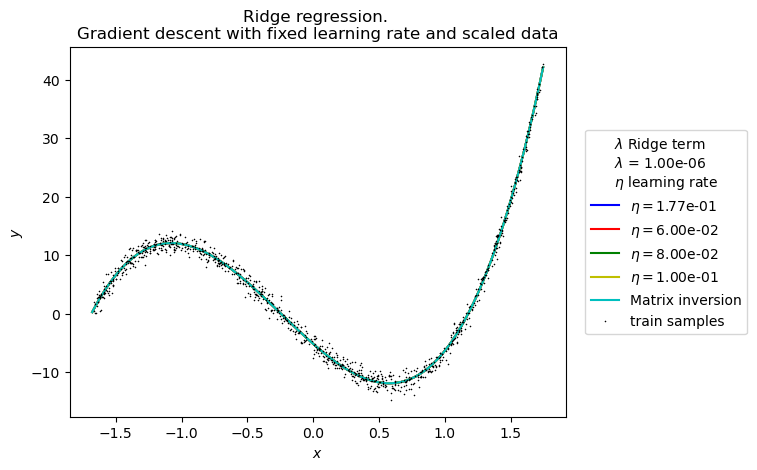

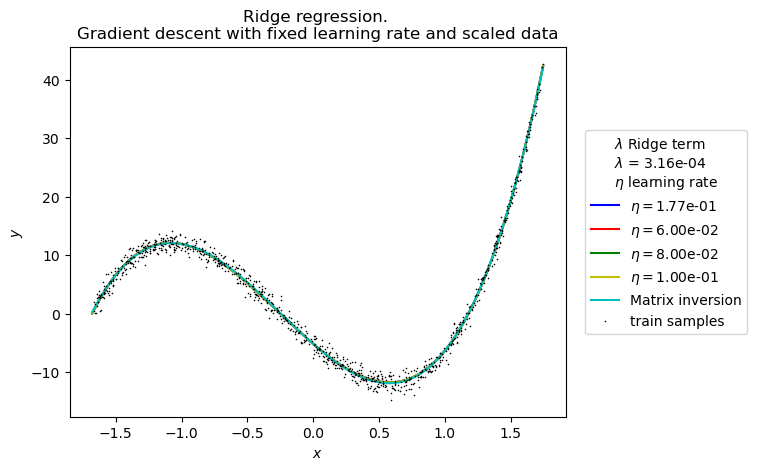

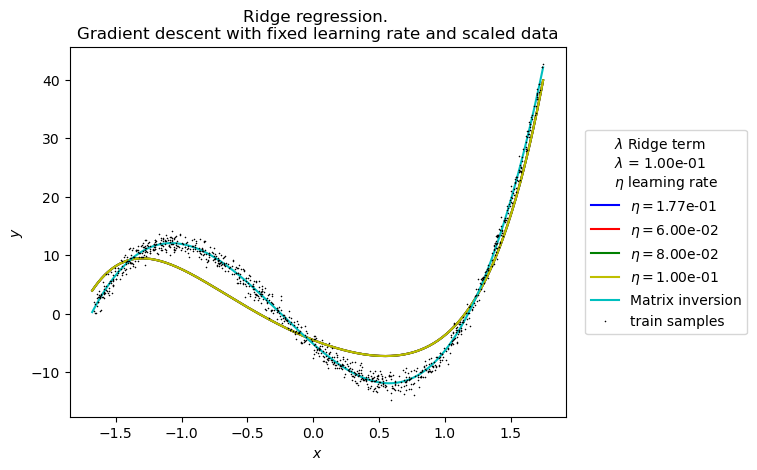

In [10]:
""" RIDGE: Gradient Descent with fixed learning rate and fixed polynomial degree """

# Setting the hyperparameters
# The first eta that we consider should be "the best" one, i.e. the one computing with the Hessian matrix
R_GD_Niterations = 50000
R_nlmbs = 3
R_lmbs = np.logspace(-6, -1, R_nlmbs) # hyperparameter for Ridge regression
tol = 1.0e-15
# Not scaled data hyperparameters
R_GD_eta_best = 1.0/EigValues.max()      # Approximation of the best learning rate                     
R_GD_etas = np.array([R_GD_eta_best, 0.00008, 0.0001, 0.00018]) 
# Scaled data hyperparameters
scaled_R_GD_eta_best = 1.0/scaled_EigValues.max()    # Approximation of the best learning rate for the scaled data        
scaled_R_GD_etas = np.array([scaled_R_GD_eta_best, 0.06, 0.08, 0.1])     

R_GD_MSE_train = np.zeros((len(R_GD_etas),R_nlmbs))
R_GD_MSE_test = np.zeros((len(R_GD_etas),R_nlmbs))
scaled_R_GD_MSE_train = np.zeros((len(scaled_R_GD_etas),R_nlmbs))
scaled_R_GD_MSE_test = np.zeros((len(scaled_R_GD_etas),R_nlmbs))

# Not scaled data case:
for i,lmb in enumerate(R_lmbs):
    # Computing the betas
    R_GD_betas = GD(X_train, y_train, n, n_features, R_GD_Niterations, R_GD_etas, lmb, tol)
    # Prediction and MSE and R-squared computation
    R_GD_ytilde = X_train @ R_GD_betas
    R_GD_MSE_train[:,i] = MSE_function(y_train, R_GD_ytilde, 'vector')
    R_GD_ypredict = X_test @ R_GD_betas
    R_GD_MSE_test[:,i] = MSE_function(y_test, R_GD_ypredict, 'vector')
    # Plot
    plt.figure(i)
    color = np.array((['b-', 'r-' , 'g-', 'y-', 'm-']))
    for j in range(len(R_GD_etas)):
        plt.plot(x_test, R_GD_ypredict[:,j], color[j],label=r'$\eta = ${:.2e}'.format(R_GD_etas[j]))
    plt.plot(x_test, OLS_ypredict, "c-", label='Matrix inversion')
    plt.plot(x, y_train ,"kx", markersize=0.5, label='train samples')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.title('Ridge regression. \n' + 'Gradient descent with fixed learning rate')
    plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title=r'$\lambda$ Ridge term' + '\n' + r'$\lambda$ = {:.2e}'.format(lmb) + '\n' + r'$\eta$ learning rate')
    plt.show()


# Scaled case:
for i,lmb in enumerate(R_lmbs):
    # Computing the betas
    scaled_R_GD_betas = GD(scaled_X_train, y_train, n, n_features, R_GD_Niterations, scaled_R_GD_etas, lmb, tol)
    # Prediction and MSE computation
    scaled_R_GD_ytilde = scaled_X_train @ scaled_R_GD_betas
    scaled_R_GD_MSE_train[:,i] = MSE_function(y_train, scaled_R_GD_ytilde, 'vector') 
    scaled_R_GD_ypredict = scaled_X_test @ scaled_R_GD_betas
    scaled_R_GD_MSE_test[:,i] = MSE_function(y_test, scaled_R_GD_ypredict, 'vector') 
    # Plot
    plt.figure(i)
    color = np.array((['b-', 'r-' , 'g-', 'y-', 'm-']))
    for j in range(len(scaled_R_GD_etas)):
        plt.plot(scaled_X_test[:,1], scaled_R_GD_ypredict[:,j], color[j],label=r'$\eta = ${:.2e}'.format(scaled_R_GD_etas[j]))
    plt.plot(scaled_X_test[:,1], scaled_OLS_ypredict, "c-", label='Matrix inversion')
    plt.plot(scaled_X_train[:,1], y_train ,"kx", markersize=0.5, label='train samples')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.title('Ridge regression. \n' + 'Gradient descent with fixed learning rate and scaled data')
    plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title=r'$\lambda$ Ridge term' + '\n' + r'$\lambda$ = {:.2e}'.format(lmb) + '\n' + r'$\eta$ learning rate')
    plt.show()



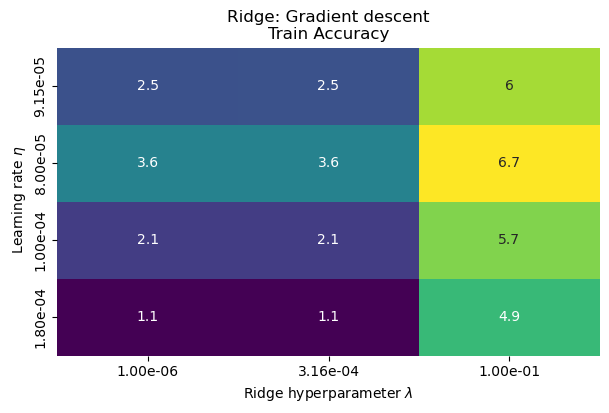

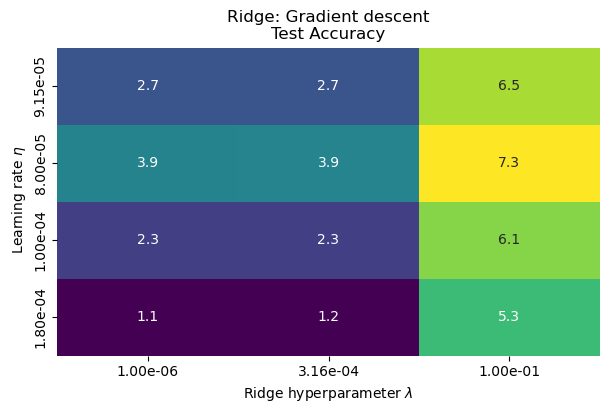

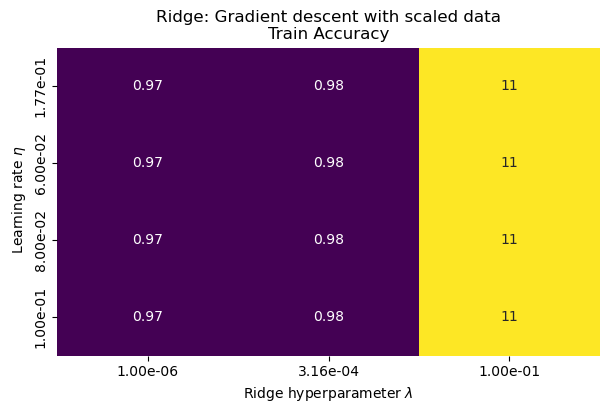

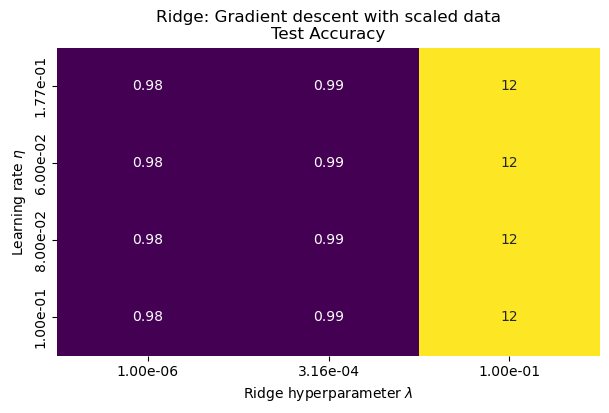

In [11]:
""" Plotting the MSE train and test of the GRADIENT DESCENT """

R_lmbs_string =["{:.2e}".format(r) for r in R_lmbs]
R_GD_etas_string =["{:.2e}".format(r) for r in R_GD_etas]
scaled_R_GD_etas_string =["{:.2e}".format(r) for r in scaled_R_GD_etas]

# Not scaled 
fig, ax = plt.subplots(figsize = (7, 4))
sns.heatmap(R_GD_MSE_train, annot=True, ax=ax, cmap="viridis", cbar=False, xticklabels=R_lmbs_string , yticklabels=R_GD_etas_string)
ax.set_title("Ridge: Gradient descent\nTrain Accuracy")
ax.set_ylabel(" Learning rate $\eta$")
ax.set_xlabel("Ridge hyperparameter $\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (7, 4))
sns.heatmap(R_GD_MSE_test, annot=True, ax=ax, cmap="viridis", cbar=False, xticklabels=R_lmbs_string , yticklabels=R_GD_etas_string)
ax.set_title("Ridge: Gradient descent\nTest Accuracy")
ax.set_ylabel(" Learning rate $\eta$")
ax.set_xlabel("Ridge hyperparameter $\lambda$")
plt.show()


# Scaled data
fig, ax = plt.subplots(figsize = (7, 4))
sns.heatmap(scaled_R_GD_MSE_train, annot=True, ax=ax, cmap="viridis", cbar=False, xticklabels=R_lmbs_string , yticklabels=scaled_R_GD_etas_string)
ax.set_title("Ridge: Gradient descent with scaled data\nTrain Accuracy")
ax.set_ylabel(" Learning rate $\eta$")
ax.set_xlabel("Ridge hyperparameter $\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (7, 4))
sns.heatmap(scaled_R_GD_MSE_test, annot=True, ax=ax, cmap="viridis", cbar=False, xticklabels=R_lmbs_string , yticklabels=scaled_R_GD_etas_string)
ax.set_title("Ridge: Gradient descent with scaled data\nTest Accuracy")
ax.set_ylabel("Learning rate $\eta$")
ax.set_xlabel("Ridge hyperparameter $\lambda$")
plt.show()

************************************************* GRADIENT DESCENT WITH MOMENTUM *************************************************

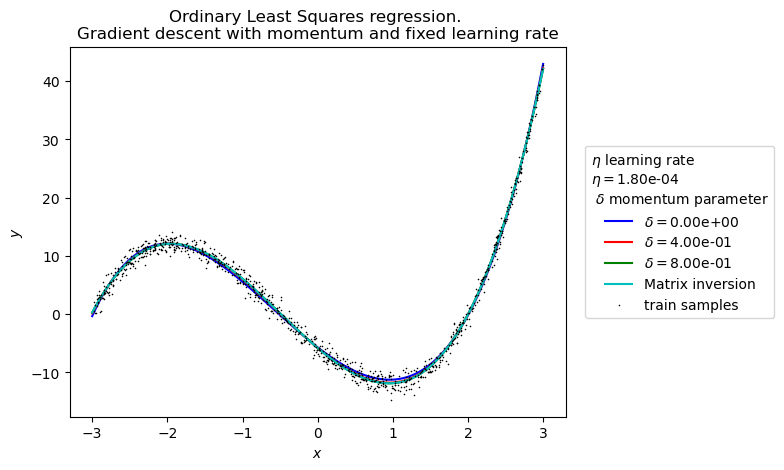

momentum parameter = 0.0 --> iteration number 17538 with norm 2 of the gradient of the loss function = 9.996e-09
momentum parameter = 0.4 --> iteration number 10510 with norm 2 of the gradient of the loss function = 9.984e-09
momentum parameter = 0.8 --> iteration number 3437 with norm 2 of the gradient of the loss function = 9.983e-09


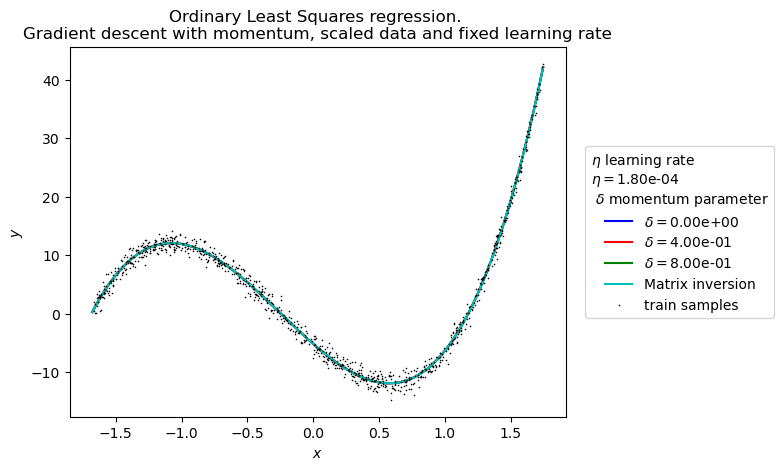

In [12]:
""" Gradient Descent with momentum """

# Setting the hyperparameters
GDmom_Niterations = 50000
lmb = 0.0           # hyperparameter for Ridge regression
tol = 1.0e-08
# Not scaled data hyperparameters
GDmom_eta = 0.00018        # learning rate
GDmom_deltas = np.array([0.0, 0.4, 0.8])         # momentum parameter
# Scaled data hyperparameters
scaled_GDmom_eta = 0.1      # learning rate for the scaled data                    
scaled_GDmom_deltas = np.array([0.0, 0.4, 0.8])         # momentum parameter 

# Not scaled data case:
# Computing the betas
GDmom_betas = GDMomentum(X_train, y_train, n, n_features, GDmom_Niterations, GDmom_eta, GDmom_deltas, lmb, tol)
# Prediction and MSE computation
GDmom_ytilde = X_train @ GDmom_betas
GDmom_MSE_train = MSE_function(y_train, GDmom_ytilde, 'vector') 
GDmom_ypredict = X_test @ GDmom_betas
GDmom_MSE_test = MSE_function(y_test, GDmom_ypredict, 'vector') 

# Plot
plt.figure(1)
color = np.array((['b-', 'r-' , 'g-', 'y-', 'm-']))
for i in range(len(GDmom_deltas)):
    plt.plot(x_test, GDmom_ypredict[:,i], color[i],label=r'$\delta = ${:.2e}'.format(GDmom_deltas[i]))
plt.plot(x_test, OLS_ypredict, "c-", label='Matrix inversion')
plt.plot(x, y_train ,"kx", markersize=0.5, label='train samples')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Ordinary Least Squares regression. \n' + 'Gradient descent with momentum and fixed learning rate')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title= r'$\eta$ learning rate' + '\n' + r'$\eta = ${:.2e}'.format(GDmom_eta) + '\n' + r' $\delta$ momentum parameter')
plt.show()


# Scaled case:
# Computing the betas
scaled_GDmom_betas = GDMomentum(scaled_X_train, y_train, n, n_features, GDmom_Niterations, scaled_GDmom_eta, scaled_GDmom_deltas, lmb, tol)
# Prediction and MSE computation
scaled_GDmom_ytilde = scaled_X_train @ scaled_GDmom_betas
scaled_GDmom_MSE_train = MSE_function(y_train, scaled_GDmom_ytilde, 'vector') 
scaled_GDmom_ypredict = scaled_X_test @ scaled_GDmom_betas
scaled_GDmom_MSE_test = MSE_function(y_test, scaled_GDmom_ypredict, 'vector') 

# Plot
plt.figure(2)
color = np.array((['b-', 'r-' , 'g-', 'y-', 'm-']))
for i in range(len(scaled_GDmom_deltas)):
    plt.plot(scaled_X_test[:,1], scaled_GDmom_ypredict[:,i], color[i],label=r'$\delta = ${:.2e}'.format(scaled_GDmom_deltas[i]))
plt.plot(scaled_X_test[:,1], scaled_OLS_ypredict, "c-", label='Matrix inversion')
plt.plot(scaled_X_train[:,1], y_train ,"kx", markersize=0.5, label='train samples')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Ordinary Least Squares regression. \n' + 'Gradient descent with momentum, scaled data and fixed learning rate')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title= r'$\eta$ learning rate' + '\n' + r'$\eta = ${:.2e}'.format(GDmom_eta) + '\n' + r' $\delta$ momentum parameter')
plt.show()


In [13]:
""" Plotting the MSE train and test of the previous study-case """

print('Gradient Descent with momentum and fixed learning rate = {:.2e}'.format(GDmom_eta))
# Not scaled 
GDmom_table = PrettyTable()
GDmom_table.title = ' OLS: NOT SCALED DATA'             
GDmom_table.field_names = ['Momentum parameter', 'MSE train', 'MSE test']
for i, delta in enumerate(GDmom_deltas):
    GDmom_table.add_row([delta, GDmom_MSE_train[i], GDmom_MSE_test[i]])
GDmom_table.add_row(['Matrix inversion', OLS_MSE_train, OLS_MSE_test])
GDmom_table.set_style(SINGLE_BORDER)
print(GDmom_table)

print('Gradient Descent with momentum and fixed learning rate = {:.2e}'.format(scaled_GDmom_eta))
# Scaled data
scaled_GDmom_table = PrettyTable()
scaled_GDmom_table.title = 'OLS: SCALED DATA'
scaled_GDmom_table.field_names = ['Momentum parameter', 'MSE train', 'MSE test']
for i, delta in enumerate(scaled_GDmom_deltas):
    scaled_GDmom_table.add_row([delta, scaled_GDmom_MSE_train[i], scaled_GDmom_MSE_test[i]])
scaled_GDmom_table.add_row(['Matrix inversion', scaled_OLS_MSE_train, scaled_OLS_MSE_test])
scaled_GDmom_table.set_style(SINGLE_BORDER)
print(scaled_GDmom_table)



Gradient Descent with momentum and fixed learning rate = 1.80e-04
┌──────────────────────────────────────────────────────────────┐
│                     OLS: NOT SCALED DATA                     │
├────────────────────┬────────────────────┬────────────────────┤
│ Momentum parameter │     MSE train      │      MSE test      │
├────────────────────┼────────────────────┼────────────────────┤
│        0.0         │ 1.100520835348034  │ 1.156474330311048  │
│        0.4         │ 0.9745045665822311 │ 0.9908971297527878 │
│        0.8         │ 0.9691605655691972 │ 0.9785512709467277 │
│  Matrix inversion  │ 0.9691605648762931 │ 0.9785492495158253 │
└────────────────────┴────────────────────┴────────────────────┘
Gradient Descent with momentum and fixed learning rate = 1.00e-01
┌──────────────────────────────────────────────────────────────┐
│                       OLS: SCALED DATA                       │
├────────────────────┬────────────────────┬────────────────────┤
│ Momentum parameter │ 

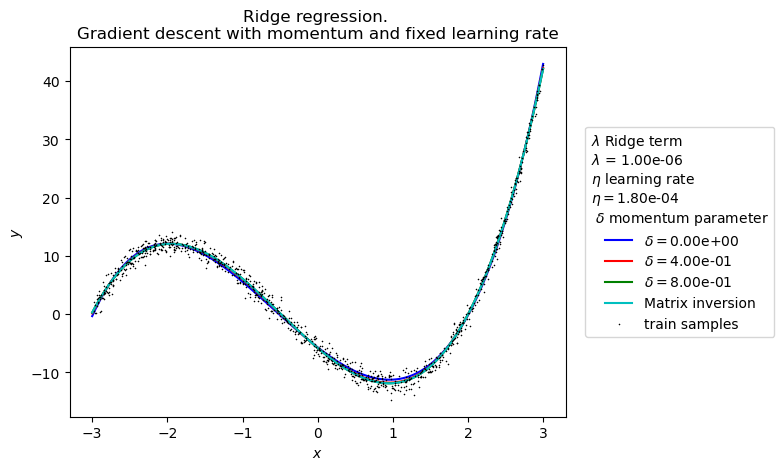

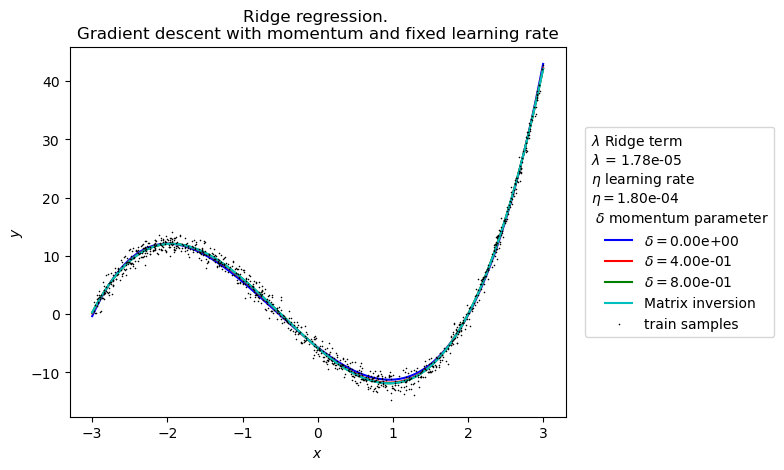

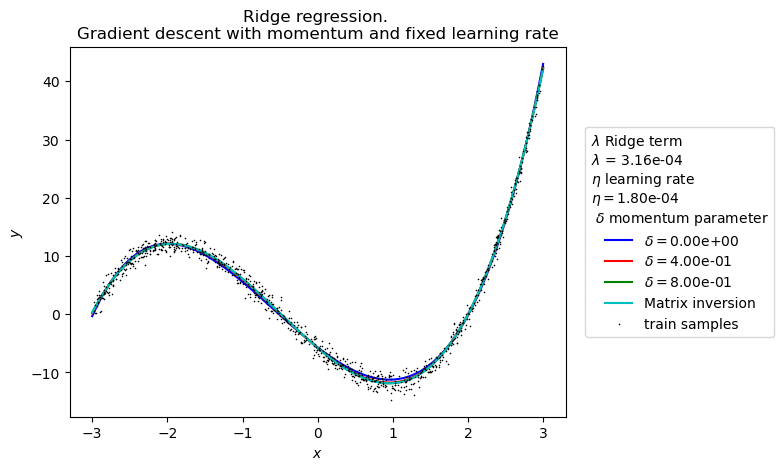

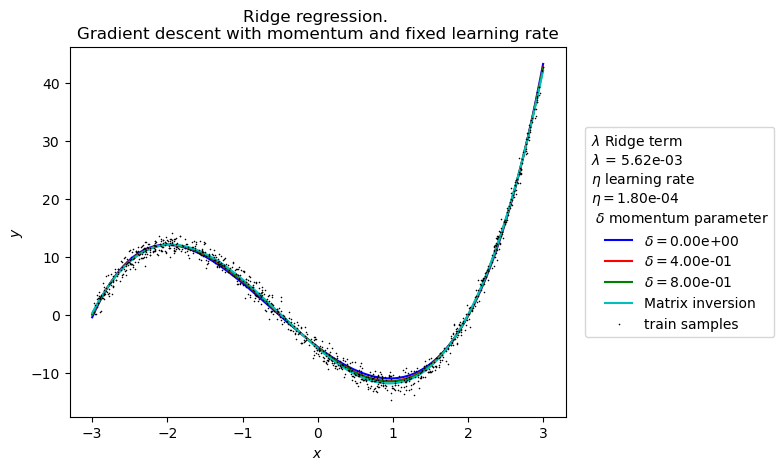

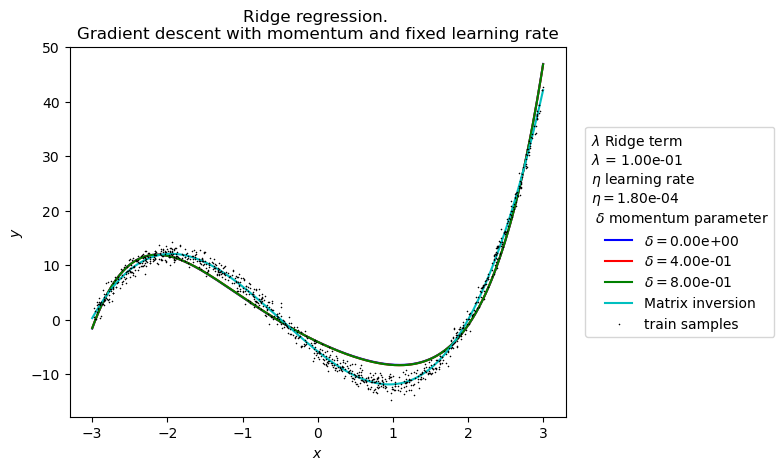

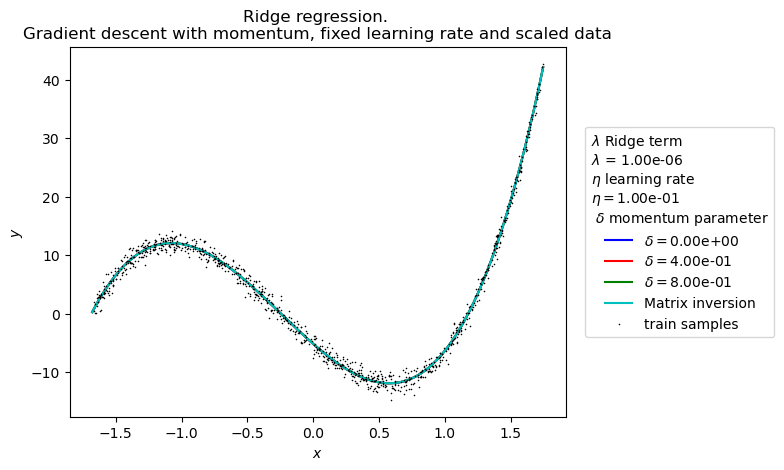

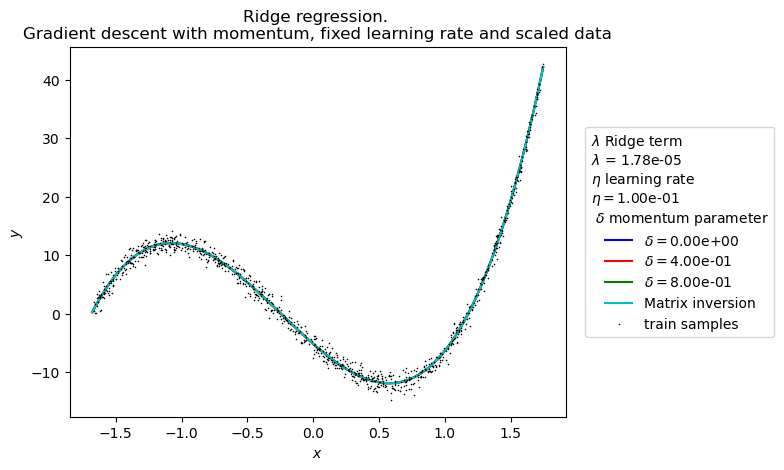

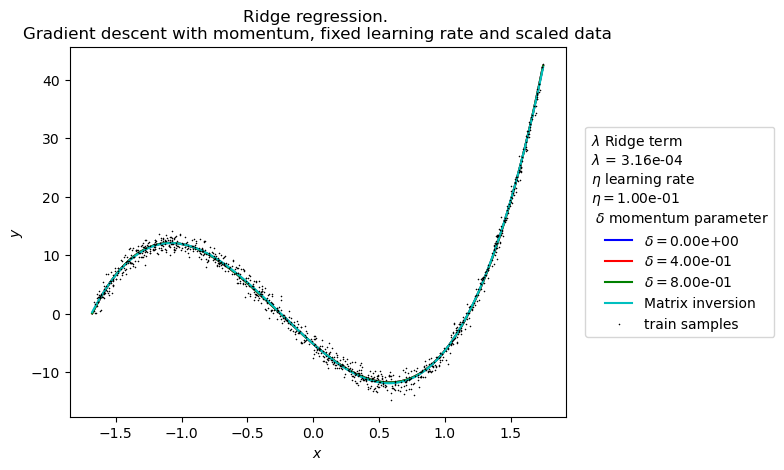

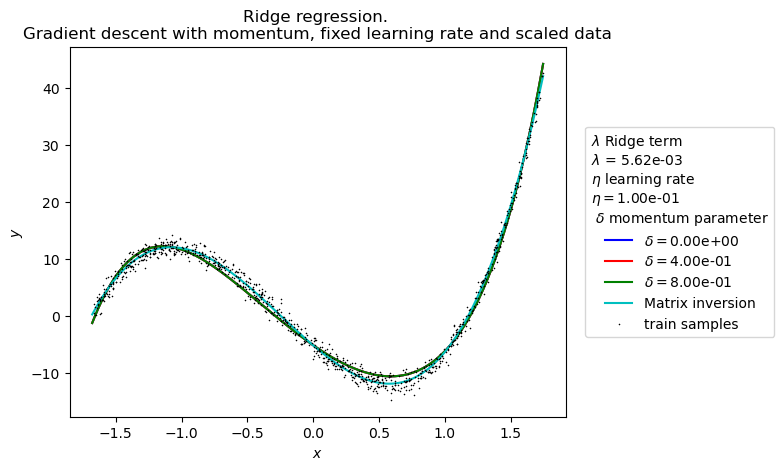

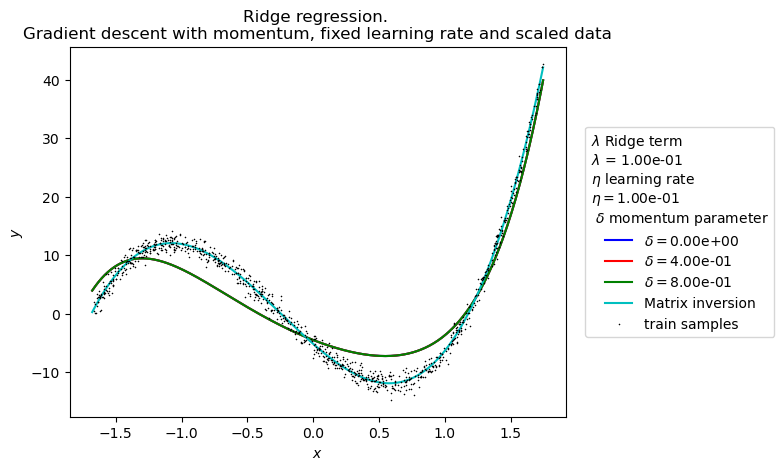

In [14]:
""" RIDGE: Gradient Descent with momentum and with fixed learning rate and fixed polynomial degree """

# Setting the hyperparameters
R_GDmom_Niterations = 50000
R_GDmom_nlmbs = 5
R_GDmom_lmbs = np.logspace(-6, -1, R_GDmom_nlmbs) # hyperparameter for Ridge regression
tol = 1.0e-15
# Not scaled data hyperparameters
R_GDmom_eta = 0.00018        # learning rate
R_GDmom_deltas = np.array([0.0, 0.4, 0.8])         # momentum parameter
# Scaled data hyperparameters
scaled_R_GDmom_eta = 0.1        # learning rate for the scaled data
scaled_R_GDmom_deltas = np.array([0.0, 0.4, 0.8])         # momentum parameter    

R_GDmom_MSE_train = np.zeros((len(R_GDmom_deltas),R_GDmom_nlmbs))
R_GDmom_MSE_test = np.zeros((len(R_GDmom_deltas),R_GDmom_nlmbs))
scaled_R_GDmom_MSE_train = np.zeros((len(scaled_R_GDmom_deltas),R_GDmom_nlmbs))
scaled_R_GDmom_MSE_test = np.zeros((len(scaled_R_GDmom_deltas),R_GDmom_nlmbs))

# Not scaled data case:
for i,lmb in enumerate(R_GDmom_lmbs):
    # Computing the betas
    R_GDmom_betas = GDMomentum(X_train, y_train, n, n_features, R_GDmom_Niterations, R_GDmom_eta, R_GDmom_deltas, lmb, tol)
    # Prediction and MSE and R-squared computation
    R_GDmom_ytilde = X_train @ R_GDmom_betas
    R_GDmom_MSE_train[:,i] = MSE_function(y_train, R_GDmom_ytilde, 'vector')
    R_GDmom_ypredict = X_test @ R_GDmom_betas
    R_GDmom_MSE_test[:,i] = MSE_function(y_test, R_GDmom_ypredict, 'vector')
    # Plot
    plt.figure(i)
    color = np.array((['b-', 'r-' , 'g-', 'y-', 'm-']))
    for j in range(len(R_GDmom_deltas)):
        plt.plot(x_test, R_GDmom_ypredict[:,j], color[j],label=r'$\delta = ${:.2e}'.format(R_GDmom_deltas[j]))
    plt.plot(x_test, OLS_ypredict, "c-", label='Matrix inversion')
    plt.plot(x, y_train ,"kx", markersize=0.5, label='train samples')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.title('Ridge regression. \n' + 'Gradient descent with momentum and fixed learning rate')
    plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title=r'$\lambda$ Ridge term' + '\n' + r'$\lambda$ = {:.2e}'.format(lmb) + '\n' + r'$\eta$ learning rate' + '\n' + r'$\eta = ${:.2e}'.format(R_GDmom_eta) + '\n' + r' $\delta$ momentum parameter')
    plt.show()


# Scaled case:
for i,lmb in enumerate(R_GDmom_lmbs):
    # Computing the betas
    scaled_R_GDmom_betas = GDMomentum(scaled_X_train, y_train, n, n_features, R_GDmom_Niterations, scaled_R_GDmom_eta, scaled_R_GDmom_deltas, lmb, tol)
    # Prediction and MSE computation
    scaled_R_GDmom_ytilde = scaled_X_train @ scaled_R_GDmom_betas
    scaled_R_GDmom_MSE_train[:,i] = MSE_function(y_train, scaled_R_GDmom_ytilde, 'vector') 
    scaled_R_GDmom_ypredict = scaled_X_test @ scaled_R_GDmom_betas
    scaled_R_GDmom_MSE_test[:,i] = MSE_function(y_test, scaled_R_GDmom_ypredict, 'vector') 
    # Plot
    plt.figure(i)
    color = np.array((['b-', 'r-' , 'g-', 'y-', 'm-']))
    for j in range(len(scaled_R_GDmom_deltas)):
        plt.plot(scaled_X_test[:,1], scaled_R_GDmom_ypredict[:,j], color[j],label=r'$\delta = ${:.2e}'.format(scaled_R_GDmom_deltas[j]))
    plt.plot(scaled_X_test[:,1], scaled_OLS_ypredict, "c-", label='Matrix inversion')
    plt.plot(scaled_X_train[:,1], y_train ,"kx", markersize=0.5, label='train samples')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.title('Ridge regression. \n' + 'Gradient descent with momentum, fixed learning rate and scaled data')
    plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title=r'$\lambda$ Ridge term' + '\n' + r'$\lambda$ = {:.2e}'.format(lmb) + '\n' + r'$\eta$ learning rate' + '\n' + r'$\eta = ${:.2e}'.format(scaled_R_GDmom_eta) + '\n' + r' $\delta$ momentum parameter')
    plt.show()



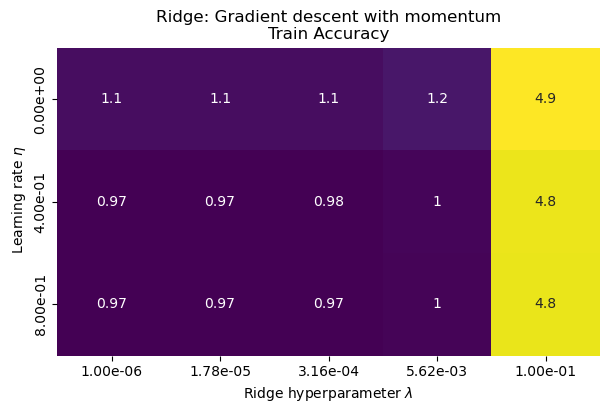

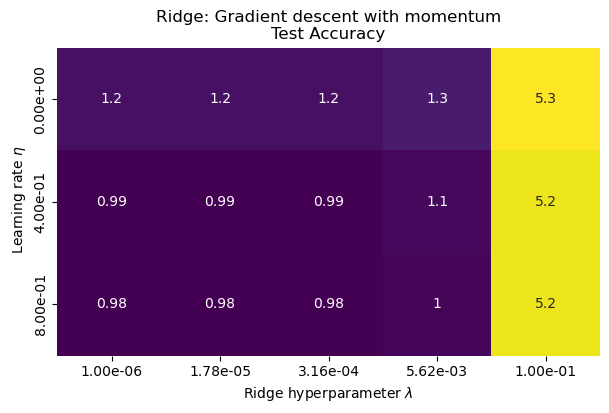

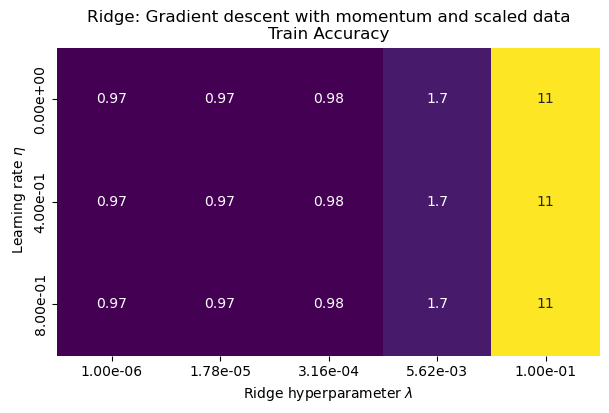

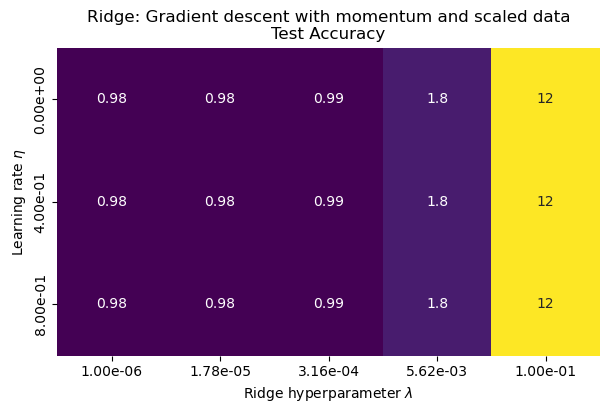

In [15]:
""" RIDGE:Plotting the MSE train and test of the GRADIENT DESCENT WITH MOMENTUM """

R_GDmom_lmbs_string =["{:.2e}".format(r) for r in R_GDmom_lmbs]
R_GDmom_deltas_string =["{:.2e}".format(r) for r in R_GDmom_deltas]
scaled_R_GDmom_deltas_string =["{:.2e}".format(r) for r in scaled_R_GDmom_deltas]

# Not scaled 
fig, ax = plt.subplots(figsize = (7, 4))
sns.heatmap(R_GDmom_MSE_train, annot=True, ax=ax, cmap="viridis", cbar=False, xticklabels=R_GDmom_lmbs_string , yticklabels=R_GDmom_deltas_string)
ax.set_title("Ridge: Gradient descent with momentum\nTrain Accuracy")
ax.set_ylabel(" Learning rate $\eta$")
ax.set_xlabel("Ridge hyperparameter $\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (7, 4))
sns.heatmap(R_GDmom_MSE_test, annot=True, ax=ax, cmap="viridis", cbar=False, xticklabels=R_GDmom_lmbs_string , yticklabels=R_GDmom_deltas_string)
ax.set_title("Ridge: Gradient descent with momentum\nTest Accuracy")
ax.set_ylabel(" Learning rate $\eta$")
ax.set_xlabel("Ridge hyperparameter $\lambda$")
plt.show()


# Scaled data
fig, ax = plt.subplots(figsize = (7, 4))
sns.heatmap(scaled_R_GDmom_MSE_train, annot=True, ax=ax, cmap="viridis", cbar=False, xticklabels=R_GDmom_lmbs_string , yticklabels=scaled_R_GDmom_deltas_string)
ax.set_title("Ridge: Gradient descent with momentum and scaled data\nTrain Accuracy")
ax.set_ylabel(" Learning rate $\eta$")
ax.set_xlabel("Ridge hyperparameter $\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (7, 4))
sns.heatmap(scaled_R_GDmom_MSE_test, annot=True, ax=ax, cmap="viridis", cbar=False, xticklabels=R_GDmom_lmbs_string , yticklabels=scaled_R_GDmom_deltas_string)
ax.set_title("Ridge: Gradient descent with momentum and scaled data\nTest Accuracy")
ax.set_ylabel("Learning rate $\eta$")
ax.set_xlabel("Ridge hyperparameter $\lambda$")
plt.show()

************************************************* STOCHASTIC GRADIENT DESCENT *************************************************

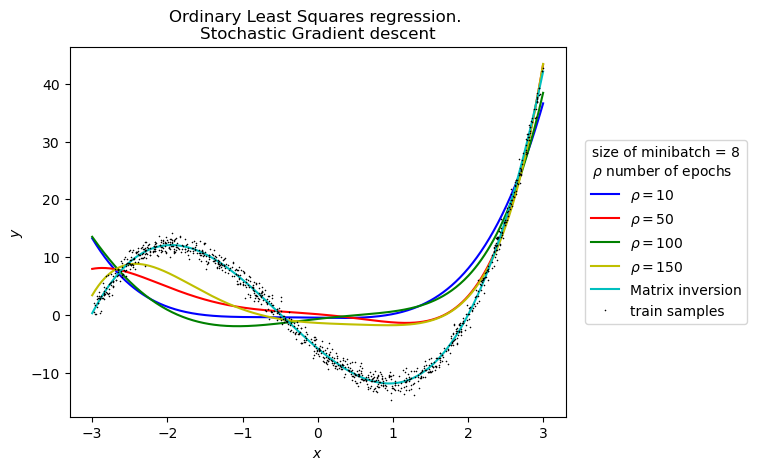

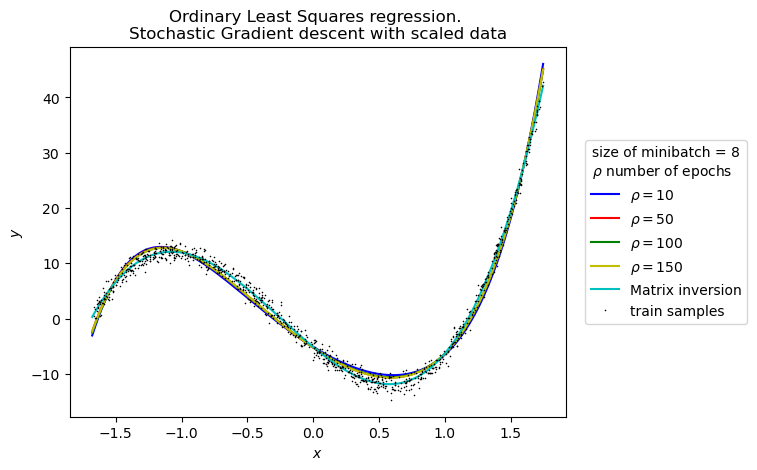

In [16]:
""" Stochastic Gradient Descent """

# Setting the hyperparameters
lmb = 0.0       # hyperparameter for Ridge regression

# Varying number of epochs
SGD_vector_n_epochs = np.array((10, 50, 100, 150))
SGD_M = 8
SGD_m = int(n/SGD_M) #number of minibatches

# Varying size of minibatch
#SGD_vector_n_epochs = 150
#SGD_M = np.array((2, 4, 8, 16))    #size of each minibatch
#SGD_m = np.asarray(n/SGD_M, dtype = 'int') #number of minibatches

# Not scaled data hyperparameters
t0, t1 = 0.005, 100
# Scaled data hyperparameters
scaled_t0, scaled_t1 = 10, 100 #5,50    10,100

# Not scaled data case:
# Computing the betas
SGD_betas = SGD(X_train, y_train, n_features, t0, t1, SGD_M, SGD_m, SGD_vector_n_epochs, lmb)
# Prediction and MSE computation
SGD_ytilde = X_train @ SGD_betas
SGD_MSE_train = MSE_function(y_train, SGD_ytilde, 'vector')
SGD_ypredict = X_test @ SGD_betas
SGD_MSE_test = MSE_function(y_test, SGD_ypredict, 'vector')

# Plot
plt.figure(1)
color = np.array((['b-', 'r-' , 'g-', 'y-', 'm-']))
if isinstance(SGD_M,int):
    for i in range(len(SGD_vector_n_epochs)):
        plt.plot(x_test, SGD_ypredict[:,i], color[i],label=r'$ \rho = ${:}'.format(SGD_vector_n_epochs[i]))
        legend_title = [r'size of minibatch = {}'.format(SGD_M) + '\n' + r'$\rho$ number of epochs']
elif isinstance(SGD_vector_n_epochs,int):
    for i in range(len(SGD_M)):
        plt.plot(x_test, SGD_ypredict[:,i], color[i],label=r'$M = ${:}'.format(SGD_M[i]))
        legend_title = [r'number of epochs = {}'.format(SGD_vector_n_epochs) + '\n' + r'$M$ size of minibatch']
plt.plot(x_test, OLS_ypredict, "c-", label='Matrix inversion')
plt.plot(x, y_train ,"kx", markersize=0.5, label='train samples')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Ordinary Least Squares regression. \n' + 'Stochastic Gradient descent') 
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title=legend_title[0])
plt.show()


# Scaled case:
# Computing the betas
scaled_SGD_betas = SGD(scaled_X_train, y_train, n_features, scaled_t0, scaled_t1, SGD_M, SGD_m, SGD_vector_n_epochs, lmb)
# Prediction and MSE computation
scaled_SGD_ytilde = scaled_X_train @ scaled_SGD_betas
scaled_SGD_MSE_train = MSE_function(y_train, scaled_SGD_ytilde, 'vector')
scaled_SGD_ypredict = scaled_X_test @ scaled_SGD_betas
scaled_SGD_MSE_test = MSE_function(y_test, scaled_SGD_ypredict, 'vector')

# Plot
plt.figure(2)
color = np.array((['b-', 'r-' , 'g-', 'y-', 'm-']))
if isinstance(SGD_M,int):
    for i in range(len(SGD_vector_n_epochs)):
        plt.plot(scaled_X_test[:,1], scaled_SGD_ypredict[:,i], color[i],label=r'$ \rho = ${:}'.format(SGD_vector_n_epochs[i]))
        legend_title = [r'size of minibatch = {}'.format(SGD_M) + '\n' + r'$\rho$ number of epochs']
elif isinstance(SGD_vector_n_epochs,int):
    for i in range(len(SGD_M)):
        plt.plot(scaled_X_test[:,1], scaled_SGD_ypredict[:,i], color[i],label=r'$M = ${:}'.format(SGD_M[i]))
        legend_title = [r'number of epochs = {}'.format(SGD_vector_n_epochs) + '\n' + r'$M$ size of minibatch']
plt.plot(scaled_X_test[:,1], scaled_OLS_ypredict, "c-", label='Matrix inversion')
plt.plot(scaled_X_train[:,1], y_train ,"kx", markersize=0.5, label='train samples')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Ordinary Least Squares regression. \n' + 'Stochastic Gradient descent with scaled data')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title=legend_title[0])
plt.show()

In [17]:
""" Plotting the MSE train and test of the previous study-case """
print('Stochastic Gradient Descent')

# Not scaled 
SGD_table = PrettyTable()
SGD_table.title = 'OLS: NOT SCALED DATA'
if isinstance(SGD_M,int):
    SGD_table.field_names = ['Number of epochs', 'MSE train', 'MSE test']
    for i, rho in enumerate(SGD_vector_n_epochs):
        SGD_table.add_row([rho, SGD_MSE_train[i], SGD_MSE_test[i]])
elif isinstance(SGD_vector_n_epochs,int):
    SGD_table.field_names = ['Size of minibatch', 'MSE train', 'MSE test']
    for i, Mi in enumerate(SGD_M):
        SGD_table.add_row([Mi, SGD_MSE_train[i], SGD_MSE_test[i]])
SGD_table.add_row(['Matrix inversion', OLS_MSE_train, OLS_MSE_test])
SGD_table.set_style(SINGLE_BORDER)
print(SGD_table)



# Scaled data
scaled_SGD_table = PrettyTable()
scaled_SGD_table.title = 'OLS: SCALED DATA'
scaled_SGD_table.field_names = ['Size of minibatch', 'MSE train', 'MSE test']
if isinstance(SGD_M,int):
    scaled_SGD_table.field_names = ['Number of epochs', 'MSE train', 'MSE test']
    for i, rho in enumerate(SGD_vector_n_epochs):
        scaled_SGD_table.add_row([rho, scaled_SGD_MSE_train[i], scaled_SGD_MSE_test[i]])
elif isinstance(SGD_vector_n_epochs,int):
    scaled_SGD_table.field_names = ['Size of minibatch', 'MSE train', 'MSE test']
    for i, Mi in enumerate(SGD_M):
        scaled_SGD_table.add_row([Mi, scaled_SGD_MSE_train[i], scaled_SGD_MSE_test[i]])
scaled_SGD_table.add_row(['Matrix inversion', scaled_OLS_MSE_train, scaled_OLS_MSE_test])
scaled_SGD_table.set_style(SINGLE_BORDER)
print(scaled_SGD_table)



Stochastic Gradient Descent
┌────────────────────────────────────────────────────────────┐
│                    OLS: NOT SCALED DATA                    │
├──────────────────┬────────────────────┬────────────────────┤
│ Number of epochs │     MSE train      │      MSE test      │
├──────────────────┼────────────────────┼────────────────────┤
│        10        │ 66.13874094945598  │ 68.57283802425634  │
│        50        │ 40.17791836547709  │ 41.63509890978809  │
│       100        │ 70.96643055122198  │ 73.28273630064528  │
│       150        │ 31.119186538657715 │ 32.55294543323077  │
│ Matrix inversion │ 0.9691605648762931 │ 0.9785492495158253 │
└──────────────────┴────────────────────┴────────────────────┘
┌────────────────────────────────────────────────────────────┐
│                      OLS: SCALED DATA                      │
├──────────────────┬────────────────────┬────────────────────┤
│ Number of epochs │     MSE train      │      MSE test      │
├──────────────────┼───────

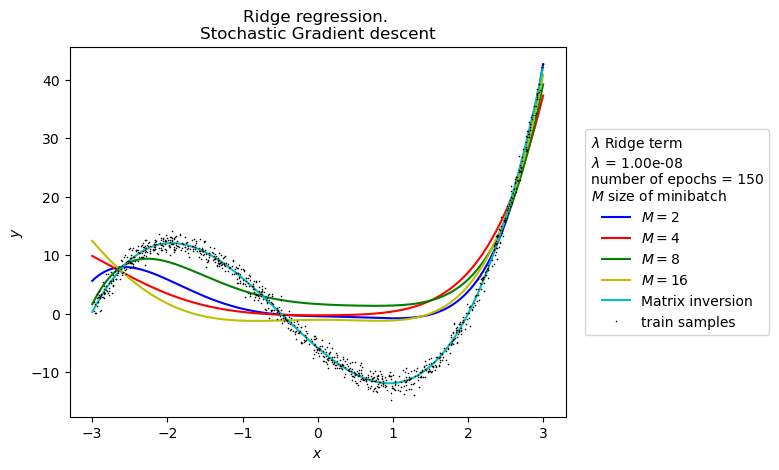

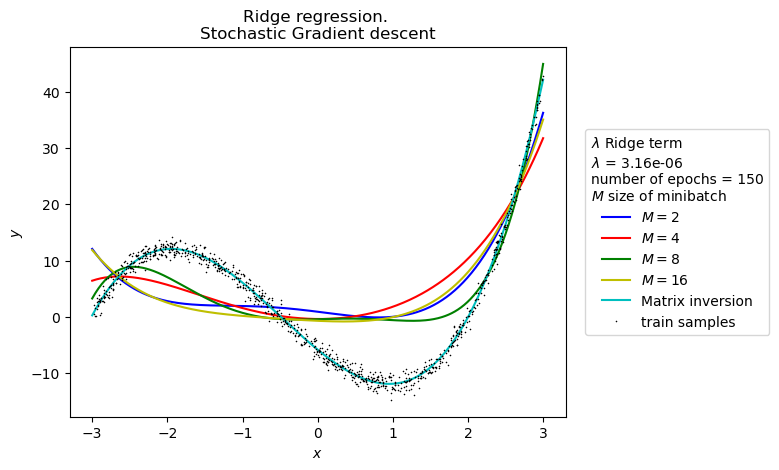

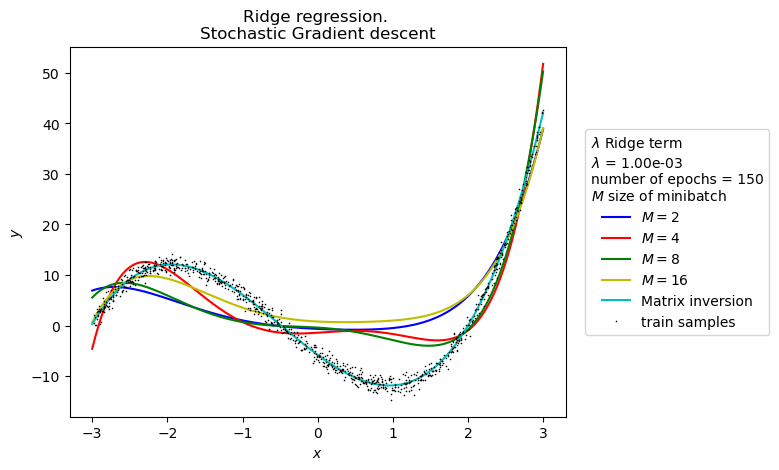

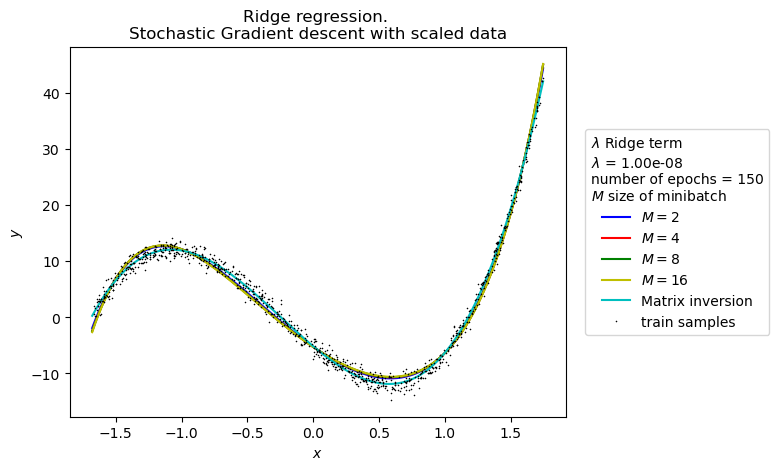

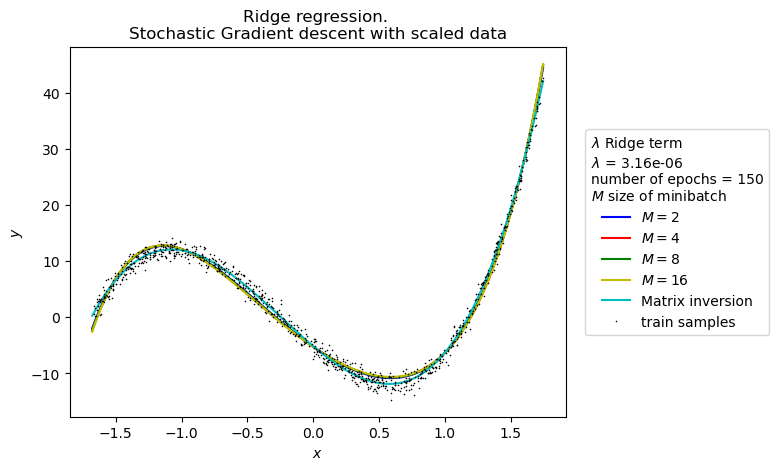

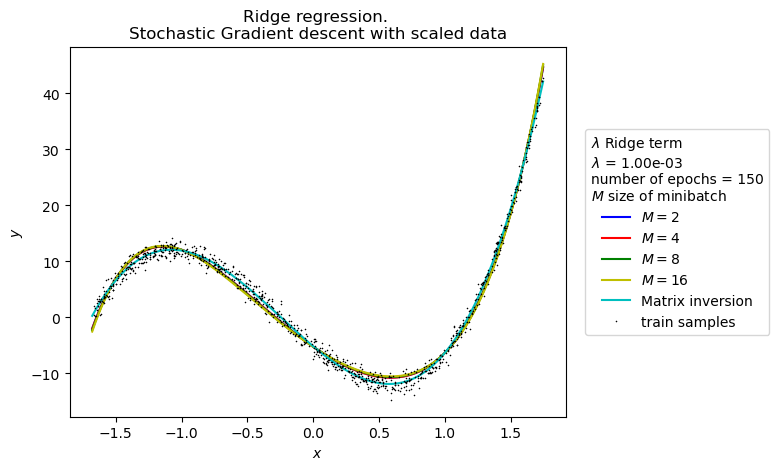

In [18]:
""" RIDGE: Stochastic Gradient Descent with fixed polynomial degree """

# Setting the hyperparameters
R_SGD_nlmbs = 3
R_SGD_lmbs = np.logspace(-8, -3, R_SGD_nlmbs) # hyperparameter for Ridge regression

# Varying number of epochs
#R_SGD_vector_n_epochs = np.array((10, 50, 100, 150))
#R_SGD_M = 8
#R_SGD_m = int(n/R_SGD_M) #number of minibatches

# Varying size of minibatch
R_SGD_vector_n_epochs = 150
R_SGD_M = np.array((2, 4, 8, 16))    #size of each minibatch
R_SGD_m = np.asarray(n/R_SGD_M, dtype = 'int') #number of minibatches

# Not scaled data hyperparameters
R_t0, R_t1 = 0.005, 100
# Scaled data hyperparameters
scaled_R_t0, scaled_R_t1 = 10, 100 #5,50    10,100   

if isinstance(R_SGD_vector_n_epochs, int):
    k = len(R_SGD_M)
else:
    k = len(R_SGD_vector_n_epochs)
R_SGD_MSE_train = np.zeros((k,R_SGD_nlmbs))
R_SGD_MSE_test = np.zeros((k,R_SGD_nlmbs))
scaled_R_SGD_MSE_train = np.zeros((k,R_SGD_nlmbs))
scaled_R_SGD_MSE_test = np.zeros((k,R_SGD_nlmbs))

# Not scaled data case:
for i,lmb in enumerate(R_SGD_lmbs):
    # Computing the betas
    R_SGD_betas = SGD(X_train, y_train, n_features, R_t0, R_t1, R_SGD_M, R_SGD_m, R_SGD_vector_n_epochs, lmb)
    # Prediction and MSE and R-squared computation
    R_SGD_ytilde = X_train @ R_SGD_betas
    R_SGD_MSE_train[:,i] = MSE_function(y_train, R_SGD_ytilde, 'vector')
    R_SGD_ypredict = X_test @ R_SGD_betas
    R_SGD_MSE_test[:,i] = MSE_function(y_test, R_SGD_ypredict, 'vector')
    # Plot
    plt.figure(i)
    color = np.array((['b-', 'r-' , 'g-', 'y-', 'm-']))
    if isinstance(R_SGD_M,int):
        for j in range(len(R_SGD_vector_n_epochs)):
            plt.plot(x_test, R_SGD_ypredict[:,j], color[j],label=r'$ \rho = ${:}'.format(R_SGD_vector_n_epochs[j]))
            legend_title = [r'$\lambda$ Ridge term' + '\n' + r'$\lambda$ = {:.2e}'.format(lmb) + '\n' + r'size of minibatch = {}'.format(R_SGD_M) + '\n' + r'$\rho$ number of epochs']
    elif isinstance(R_SGD_vector_n_epochs,int):
        for j in range(len(R_SGD_M)):
            plt.plot(x_test, R_SGD_ypredict[:,j], color[j],label=r'$M = ${:}'.format(R_SGD_M[j]))
            legend_title = [r'$\lambda$ Ridge term' + '\n' + r'$\lambda$ = {:.2e}'.format(lmb) + '\n' + r'number of epochs = {}'.format(R_SGD_vector_n_epochs) + '\n' + r'$M$ size of minibatch']
    plt.plot(x_test, OLS_ypredict, "c-", label='Matrix inversion')
    plt.plot(x, y_train ,"kx", markersize=0.5, label='train samples')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.title('Ridge regression. \n' + 'Stochastic Gradient descent') 
    plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title=legend_title[0])
    plt.show()


# Scaled case:
for i,lmb in enumerate(R_SGD_lmbs):
    # Computing the betas
    scaled_R_SGD_betas = SGD(scaled_X_train, y_train, n_features, scaled_R_t0, scaled_R_t1, R_SGD_M, R_SGD_m, R_SGD_vector_n_epochs, lmb)
    # Prediction and MSE and R-squared computation
    scaled_R_SGD_ytilde = scaled_X_train @ scaled_R_SGD_betas
    scaled_R_SGD_MSE_train[:,i] = MSE_function(y_train, scaled_R_SGD_ytilde, 'vector')
    scaled_R_SGD_ypredict = scaled_X_test @ scaled_R_SGD_betas
    scaled_R_SGD_MSE_test[:,i] = MSE_function(y_test, scaled_R_SGD_ypredict, 'vector')
    # Plot
    plt.figure(i)
    color = np.array((['b-', 'r-' , 'g-', 'y-', 'm-']))
    if isinstance(R_SGD_M,int):
        for j in range(len(R_SGD_vector_n_epochs)):
            plt.plot(scaled_X_test[:,1], scaled_R_SGD_ypredict[:,j], color[j],label=r'$ \rho = ${:}'.format(R_SGD_vector_n_epochs[j]))
            legend_title = [r'$\lambda$ Ridge term' + '\n' + r'$\lambda$ = {:.2e}'.format(lmb) + '\n' + r'size of minibatch = {}'.format(R_SGD_M) + '\n' + r'$\rho$ number of epochs']
    elif isinstance(R_SGD_vector_n_epochs,int):
        for j in range(len(R_SGD_M)):
            plt.plot(scaled_X_test[:,1], scaled_R_SGD_ypredict[:,j], color[j],label=r'$M = ${:}'.format(R_SGD_M[j]))
            legend_title = [r'$\lambda$ Ridge term' + '\n' + r'$\lambda$ = {:.2e}'.format(lmb) + '\n' + r'number of epochs = {}'.format(R_SGD_vector_n_epochs) + '\n' + r'$M$ size of minibatch']
    plt.plot(scaled_X_test[:,1], scaled_OLS_ypredict, "c-", label='Matrix inversion')
    plt.plot(scaled_X_train[:,1], y_train ,"kx", markersize=0.5, label='train samples')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.title('Ridge regression. \n' + 'Stochastic Gradient descent with scaled data') 
    plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title=legend_title[0])
    plt.show()

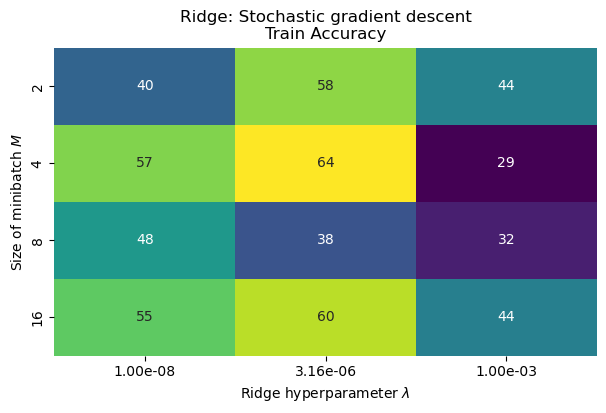

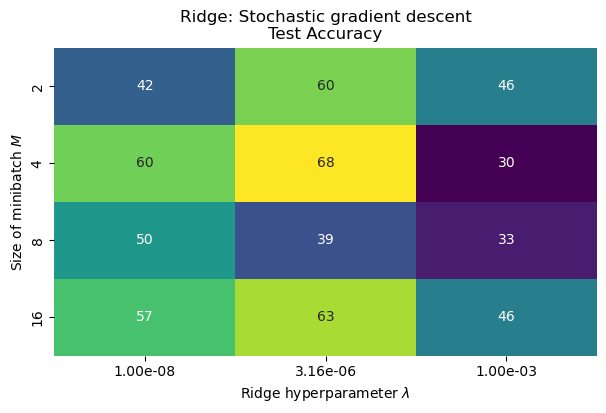

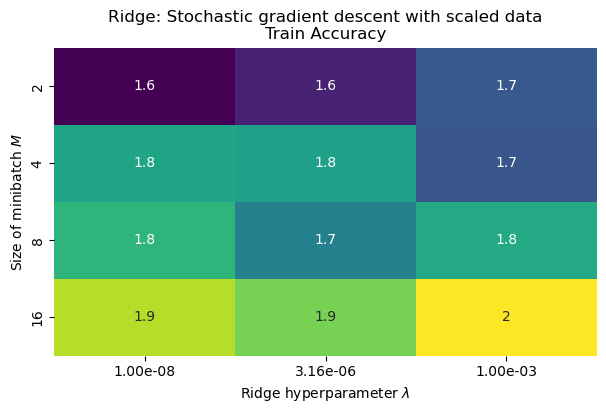

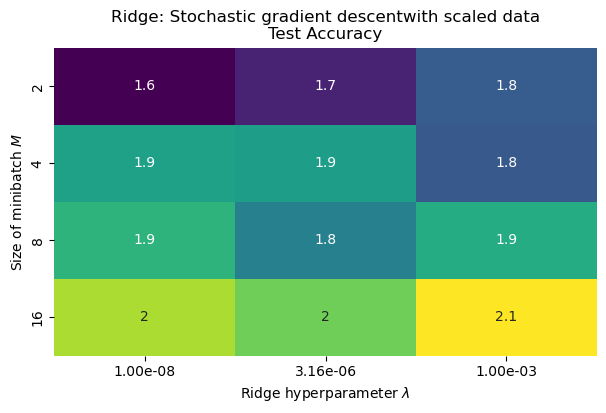

In [19]:
""" RIDGE: Plotting the MSE train and test of STOCHASTIC GRADIENT DESCENT """

R_SGD_lmbs_string =["{:.2e}".format(r) for r in R_SGD_lmbs]

# Not scaled 
fig, ax = plt.subplots(figsize = (7, 4))
if isinstance(R_SGD_M,int):
    sns.heatmap(R_SGD_MSE_train, annot=True, ax=ax, cmap="viridis", cbar=False, xticklabels=R_SGD_lmbs_string , yticklabels=R_SGD_vector_n_epochs)
    ax.set_ylabel(r"Number of epochs $\rho$")
elif isinstance(R_SGD_vector_n_epochs,int):
    sns.heatmap(R_SGD_MSE_train, annot=True, ax=ax, cmap="viridis", cbar=False, xticklabels=R_SGD_lmbs_string , yticklabels=R_SGD_M)
    ax.set_ylabel(r"Size of minibatch $M$")
ax.set_title("Ridge: Stochastic gradient descent\nTrain Accuracy")
ax.set_xlabel(r"Ridge hyperparameter $\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (7, 4))
if isinstance(R_SGD_M,int):
    sns.heatmap(R_SGD_MSE_test, annot=True, ax=ax, cmap="viridis", cbar=False, xticklabels=R_SGD_lmbs_string , yticklabels=R_SGD_vector_n_epochs)
    ax.set_ylabel(r"Number of epochs $\rho$")
elif isinstance(R_SGD_vector_n_epochs,int):
    sns.heatmap(R_SGD_MSE_test, annot=True, ax=ax, cmap="viridis", cbar=False, xticklabels=R_SGD_lmbs_string , yticklabels=R_SGD_M)
    ax.set_ylabel(r"Size of minibatch $M$")
ax.set_title("Ridge: Stochastic gradient descent\nTest Accuracy")
ax.set_xlabel(r"Ridge hyperparameter $\lambda$")
plt.show()


# Scaled data
fig, ax = plt.subplots(figsize = (7, 4))
if isinstance(R_SGD_M,int):
    sns.heatmap(scaled_R_SGD_MSE_train, annot=True, ax=ax, cmap="viridis", cbar=False, xticklabels=R_SGD_lmbs_string , yticklabels=R_SGD_vector_n_epochs)
    ax.set_ylabel(r"Number of epochs $\rho$")
elif isinstance(R_SGD_vector_n_epochs,int):
    sns.heatmap(scaled_R_SGD_MSE_train, annot=True, ax=ax, cmap="viridis", cbar=False, xticklabels=R_SGD_lmbs_string , yticklabels=R_SGD_M)
    ax.set_ylabel(r"Size of minibatch $M$")
ax.set_title("Ridge: Stochastic gradient descent with scaled data\nTrain Accuracy")
ax.set_xlabel(r"Ridge hyperparameter $\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (7, 4))
if isinstance(R_SGD_M,int):
    sns.heatmap(scaled_R_SGD_MSE_test, annot=True, ax=ax, cmap="viridis", cbar=False, xticklabels=R_SGD_lmbs_string , yticklabels=R_SGD_vector_n_epochs)
    ax.set_ylabel(r"Number of epochs $\rho$")
elif isinstance(R_SGD_vector_n_epochs,int):
    sns.heatmap(scaled_R_SGD_MSE_test, annot=True, ax=ax, cmap="viridis", cbar=False, xticklabels=R_SGD_lmbs_string , yticklabels=R_SGD_M)
    ax.set_ylabel(r"Size of minibatch $M$")
ax.set_title("Ridge: Stochastic gradient descentwith scaled data\nTest Accuracy")
ax.set_xlabel(r"Ridge hyperparameter $\lambda$")
plt.show()

************************************************************** ADAGRAD ************************************************************** 

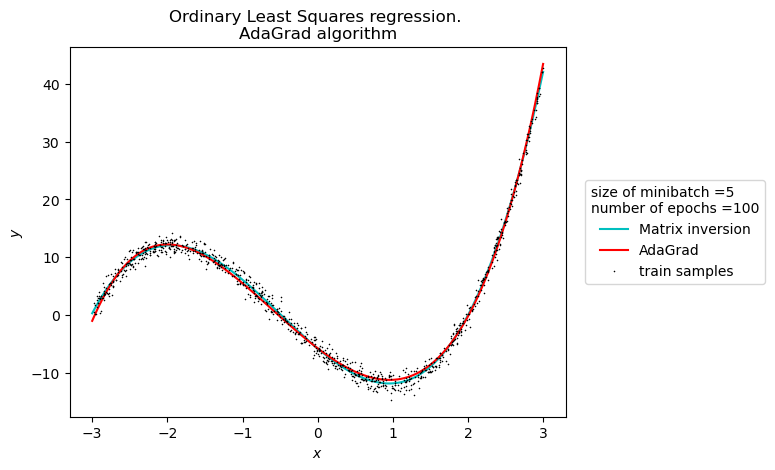

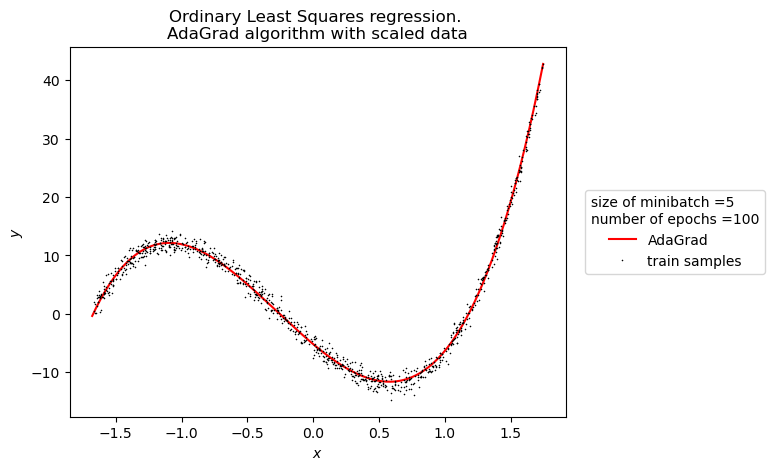

In [20]:
""" AdaGrad 
    Pick which hyperparameter you want to vary: number of epochs, size of minibatch or neither """

# Setting the hyperparameters
lmb = 0.0       # hyperparameter for Ridge regression
epsilon = 10**(-8)  #small quantity to avoid division by zero
# Not scaled data hyperparameters
t0, t1 = 100, 50
# Scaled data hyperparameters
scaled_t0, scaled_t1 = 500, 50

# Varying number of size of minibatch or not. Fixed number of epochs
AG_n_epochs = 100
AG_M = 5
AG_m = int(n/AG_M)
AG_case = 'scalar'

# Not scaled data case:
# Computing the betas
AG_beta = AdaGrad(X_train, y_train, t0, t1, AG_M, AG_m, AG_n_epochs, lmb, epsilon)
# Prediction and MSE computation
AG_ytilde = X_train @ AG_beta
AG_MSE_train = MSE_function(y_train, AG_ytilde, AG_case)  
AG_ypredict = X_test @ AG_beta
AG_MSE_test = MSE_function(y_test, AG_ypredict, AG_case)

# Plot 
plt.figure(1)
color = np.array((['b-', 'r-' , 'g-', 'y-', 'm-']))
plt.plot(x_test, OLS_ypredict, "c-", label='Matrix inversion')
if isinstance(AG_M,int) and isinstance(AG_n_epochs, int):
    plt.plot(x_test, AG_ypredict, "r-",label='AdaGrad')
    legend_title = ['size of minibatch ={} \n'.format(AG_M) + 'number of epochs ={}'.format(AG_n_epochs)]
elif isinstance(AG_M,int):
    for i in range(len(AG_n_epochs)):
        plt.plot(x_test, AG_ypredict[:,i], color[i], label=r'$\rho = ${}'.format(AG_n_epochs[i]))
        legend_title = ['size of minibatch = {}'.format(AG_M) + '\n' + r'$\rho$ number of epochs']
elif isinstance(AG_n_epochs,int):
    for i in range(len(AG_M)):
        plt.plot(x_test, AG_ypredict[:,i], color[i],label=r'$M = ${}'.format(AG_M[i]))
        legend_title = ['number of epochs = {}'.format(AG_n_epochs) + '\n' + r'$M$ size of minibatch']
plt.plot(x, y_train ,"kx", markersize=0.5, label='train samples')
plt.xlabel(r'$x$') 
plt.ylabel(r'$y$')
plt.title('Ordinary Least Squares regression. \n' + 'AdaGrad algorithm')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title=legend_title[0])
plt.show()


# Scaled case:
# Computing the betas
scaled_AG_beta = AdaGrad(scaled_X_train, y_train, scaled_t0, scaled_t1, AG_M, AG_m, AG_n_epochs, lmb, epsilon)
# Prediction and MSE computation
scaled_AG_ytilde = scaled_X_train @ scaled_AG_beta
scaled_AG_MSE_train = MSE_function(y_train, scaled_AG_ytilde, AG_case)
scaled_AG_ypredict = scaled_X_test @ scaled_AG_beta
scaled_AG_MSE_test = MSE_function(y_test, scaled_AG_ypredict, AG_case)

# Plot
plt.figure(2)
color = np.array((['b-', 'r-' , 'g-', 'y-', 'm-']))
#plt.plot(scaled_X_test[:,1], scaled_OLS_ypredict, "c-", label='Matrix inversion')
if isinstance(AG_M,int) and isinstance(AG_n_epochs, int):
    plt.plot(scaled_X_test[:,1], scaled_AG_ypredict, "r-", label='AdaGrad')
    legend_title = ['size of minibatch ={}\n'.format(AG_M) + 'number of epochs ={}'.format(AG_n_epochs)]
elif isinstance(AG_M,int):
    for i in range(len(AG_n_epochs)):
        plt.plot(scaled_X_test[:,1], scaled_AG_ypredict[:,i], color[i],label=r'$\rho = ${}'.format(AG_n_epochs[i]))
        legend_title = ['size of minibatch = {}'.format(AG_M) + '\n' + r'$\rho$ number of epochs']
elif isinstance(AG_n_epochs,int):
    for i in range(len(AG_M)):
        plt.plot(scaled_X_test[:,1], scaled_AG_ypredict[:,i], color[i],label=r'$M = ${}'.format(AG_M[i]))
        legend_title = ['number of epochs = {}'.format(AG_n_epochs) + '\n' + r'$M$ size of minibatch']
plt.plot(scaled_X_train[:,1], y_train ,"kx", markersize=0.5, label='train samples')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Ordinary Least Squares regression. \n' + 'AdaGrad algorithm with scaled data')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title=legend_title[0])
plt.show()


In [21]:
""" Plotting the MSE train and test of the previous study-case """
print('AdaGrad with sixe of minibatch = {} and number of epochs = {}'.format(AG_M, AG_n_epochs))

# Not scaled 
AG_table = PrettyTable()
AG_table.title = 'OLS: NOT SCALED DATA'
AG_table.field_names = ['Size of minibatch', 'MSE train', 'MSE test']
AG_table.add_row([AG_M, AG_MSE_train, AG_MSE_test])
AG_table.add_row(['Matrix inversion', OLS_MSE_train, OLS_MSE_test])
AG_table.set_style(SINGLE_BORDER)
print(AG_table)

# Scaled data
scaled_AG_table = PrettyTable()
scaled_AG_table.title = 'OLS: SCALED DATA'
scaled_AG_table.field_names = ['Size of minibatch', 'MSE train', 'MSE test']
scaled_AG_table.add_row([AG_M, scaled_AG_MSE_train, scaled_AG_MSE_test])
scaled_AG_table.add_row(['Matrix inversion', scaled_OLS_MSE_train, scaled_OLS_MSE_test])
scaled_AG_table.set_style(SINGLE_BORDER)
print(scaled_AG_table)

AdaGrad with sixe of minibatch = 5 and number of epochs = 100
┌─────────────────────────────────────────────────────────────┐
│                     OLS: NOT SCALED DATA                    │
├───────────────────┬────────────────────┬────────────────────┤
│ Size of minibatch │     MSE train      │      MSE test      │
├───────────────────┼────────────────────┼────────────────────┤
│         5         │ 1.1454182918789635 │ 1.1757021089505917 │
│  Matrix inversion │ 0.9691605648762931 │ 0.9785492495158253 │
└───────────────────┴────────────────────┴────────────────────┘
┌─────────────────────────────────────────────────────────────┐
│                       OLS: SCALED DATA                      │
├───────────────────┬────────────────────┬────────────────────┤
│ Size of minibatch │     MSE train      │      MSE test      │
├───────────────────┼────────────────────┼────────────────────┤
│         5         │ 1.0119262884459546 │ 1.026418198680911  │
│  Matrix inversion │ 0.9691605648762933 │

************************************************* RMSProp *************************************************

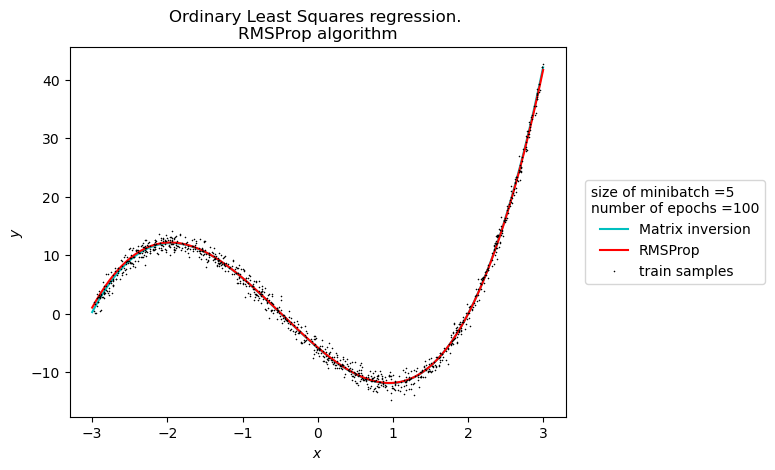

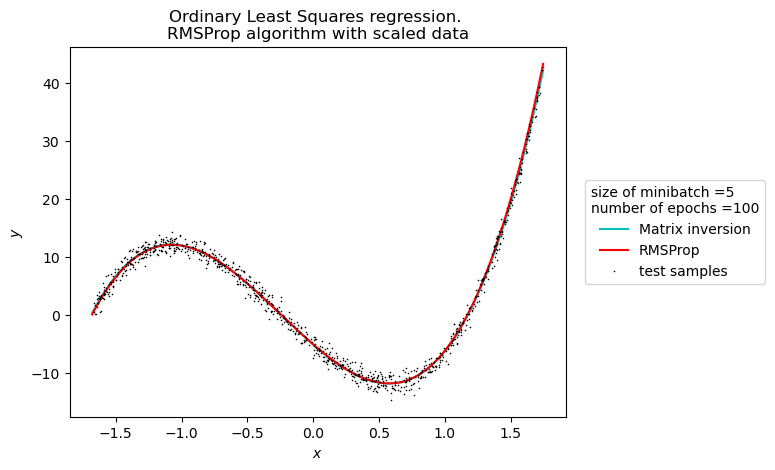

In [22]:
""" RMSProp """

# Setting the hyperparameters
lmb = 0.0       # hyperparameter for Ridge regression
RMSP_n_epochs = 100
epsilon = 1.0e-08  #small quantity to avoid division by zero
gamma = 0.9
RMSP_M = 5  #size of each minibatch
RMSP_m = int(n/RMSP_M) #number of minibatches
# Not scaled data hyperparameters
t0, t1 = 100, 50
# Scaled data hyperparameters
scaled_t0, scaled_t1 = 500, 50


# Not scaled data case:
# Computing the betas
RMSP_beta= RMSProp(X_train, y_train, t0, t1, RMSP_M, RMSP_m, RMSP_n_epochs, lmb, epsilon, gamma)
# Prediction and MSE computation
RMSP_ytilde = X_train @ RMSP_beta
RMSP_MSE_train = np.mean((y_train - RMSP_ytilde)**2) #, axis=0, keepdims=True).ravel()
RMSP_ypredict = X_test @ RMSP_beta
RMSP_MSE_test = np.mean((y_test - RMSP_ypredict)**2) #, axis=0, keepdims=True).ravel()

# Plot 
plt.figure(1)
plt.plot(x_test, OLS_ypredict, "c-", label='Matrix inversion')
plt.plot(x_test, RMSP_ypredict, "r-", label='RMSProp')
plt.plot(x, y_train ,"kx", markersize=0.5, label='train samples')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Ordinary Least Squares regression. \n' + 'RMSProp algorithm')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title='size of minibatch ={}\n'.format(RMSP_M) + 'number of epochs ={}'.format(RMSP_n_epochs))
plt.show()


# Scaled case:
# Computing the betas
scaled_RMSP_beta = RMSProp(scaled_X_train, y_train, scaled_t0, scaled_t1, RMSP_M, RMSP_m, RMSP_n_epochs, lmb, epsilon, gamma)
# Prediction and MSE computation
scaled_RMSP_ytilde = scaled_X_train @ scaled_RMSP_beta
scaled_RMSP_MSE_train = np.mean((y_train - scaled_RMSP_ytilde)**2) #, axis=0, keepdims=True).ravel()
scaled_RMSP_ypredict = scaled_X_test @ scaled_RMSP_beta
scaled_RMSP_MSE_test = np.mean((y_test - scaled_RMSP_ypredict)**2) #, axis=0, keepdims=True).ravel()

# Plot 
plt.figure(2)
plt.plot(scaled_X_test[:,1], scaled_OLS_ypredict, "c-", label='Matrix inversion')
plt.plot(scaled_X_test[:,1], scaled_RMSP_ypredict, "r-", label='RMSProp')
plt.plot(scaled_X_train[:,1], y_train ,"kx", markersize=0.5, label='test samples')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Ordinary Least Squares regression. \n' + 'RMSProp algorithm with scaled data')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title='size of minibatch ={}\n'.format(RMSP_M) + 'number of epochs ={}'.format(RMSP_n_epochs))
plt.show()


In [23]:
""" Plotting the MSE train and test of the previous study-case """
print('RMSProp with sixe of minibatch = {} and number of epochs = {}'.format(RMSP_M, RMSP_n_epochs))

# Not scaled 
AG_table = PrettyTable()
AG_table.title = 'OLS: NOT SCALED DATA'
AG_table.field_names = ['Size of minibatch', 'MSE train', 'MSE test']
AG_table.add_row([RMSP_M, RMSP_MSE_train, RMSP_MSE_test])
AG_table.add_row(['Matrix inversion', OLS_MSE_train, OLS_MSE_test])
AG_table.set_style(SINGLE_BORDER)
print(AG_table)


# Scaled data
scaled_AG_table = PrettyTable()
scaled_AG_table.title = 'OLS: SCALED DATA'
scaled_AG_table.field_names = ['Size of minibatch', 'MSE train', 'MSE test']
scaled_AG_table.add_row([RMSP_M, scaled_RMSP_MSE_train, scaled_RMSP_MSE_test])
scaled_AG_table.add_row(['Matrix inversion', scaled_OLS_MSE_train, scaled_OLS_MSE_test])
scaled_AG_table.set_style(SINGLE_BORDER)
print(scaled_AG_table)

RMSProp with sixe of minibatch = 5 and number of epochs = 100
┌─────────────────────────────────────────────────────────────┐
│                     OLS: NOT SCALED DATA                    │
├───────────────────┬────────────────────┬────────────────────┤
│ Size of minibatch │     MSE train      │      MSE test      │
├───────────────────┼────────────────────┼────────────────────┤
│         5         │ 1.0068334994057806 │ 1.076619144050168  │
│  Matrix inversion │ 0.9691605648762931 │ 0.9785492495158253 │
└───────────────────┴────────────────────┴────────────────────┘
┌─────────────────────────────────────────────────────────────┐
│                       OLS: SCALED DATA                      │
├───────────────────┬────────────────────┬────────────────────┤
│ Size of minibatch │     MSE train      │      MSE test      │
├───────────────────┼────────────────────┼────────────────────┤
│         5         │ 1.0335757036703332 │ 1.0226448708377003 │
│  Matrix inversion │ 0.9691605648762933 │

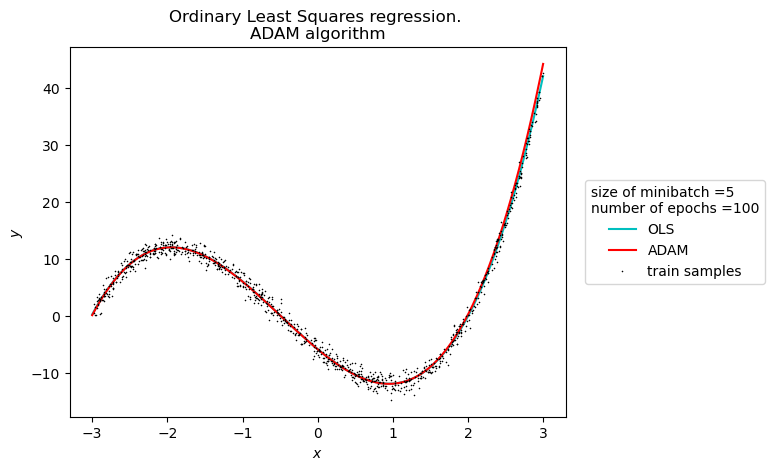

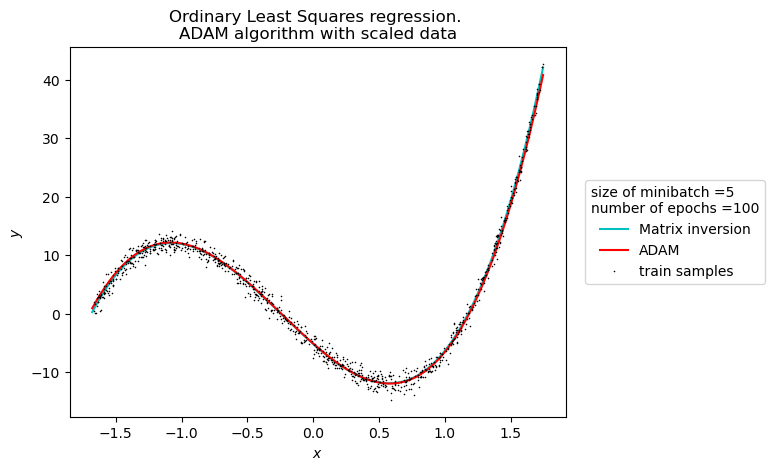

In [24]:
""" ADAM """

# Setting the hyperparameters
lmb = 0.0       # hyperparameter for Ridge regression
ADAM_n_epochs = 100
ADAM_M = 5  #size of each minibatch
ADAM_m = int(n/ADAM_M) #number of minibatches
epsilon = 1.0e-08  #small quantity to avoid division by zero
beta1 = 0.9
beta2 = 0.999
# Not scaled data hyperparameters
t0, t1 = 100, 50
# Scaled data hyperparameters
scaled_t0, scaled_t1 = 500, 50


# Not scaled data case:
# Computing the betas
ADAM_beta= ADAM(X_train, y_train, t0, t1, ADAM_M, ADAM_m, ADAM_n_epochs, lmb, epsilon, beta1, beta2)
# Prediction and MSE computation
ADAM_ytilde = X_train @ ADAM_beta
ADAM_MSE_train = np.mean((y_train - ADAM_ytilde)**2) #, axis=0, keepdims=True).ravel()
ADAM_ypredict = X_test @ ADAM_beta
ADAM_MSE_test = np.mean((y_test - ADAM_ypredict)**2) #, axis=0, keepdims=True).ravel()

# Plot 
plt.figure(1)
plt.plot(x_test, OLS_ypredict, "c-", label='OLS')
plt.plot(x_test, ADAM_ypredict, "r-", label='ADAM')
plt.plot(x, y_train ,"kx", markersize=0.5, label='train samples')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Ordinary Least Squares regression. \n' + 'ADAM algorithm')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title='size of minibatch ={}\n'.format(ADAM_M) + 'number of epochs ={}'.format(ADAM_n_epochs))
plt.show()


# Scaled case:
# Computing the betas
scaled_ADAM_beta= ADAM(scaled_X_train, y_train, scaled_t0, scaled_t1, ADAM_M, ADAM_m, ADAM_n_epochs, lmb, epsilon, beta1, beta2)
# Prediction and MSE computation
scaled_ADAM_ytilde = scaled_X_train @ scaled_ADAM_beta
scaled_ADAM_MSE_train = np.mean((y_train - scaled_ADAM_ytilde)**2) #, axis=0, keepdims=True).ravel()
scaled_ADAM_ypredict = scaled_X_test @ scaled_ADAM_beta
scaled_ADAM_MSE_test = np.mean((y_test - scaled_ADAM_ypredict)**2) #, axis=0, keepdims=True).ravel()

# Plot
plt.figure(2)
plt.plot(scaled_X_test[:,1], scaled_OLS_ypredict, "c-", label='Matrix inversion')
plt.plot(scaled_X_test[:,1], scaled_ADAM_ypredict, "r-", label='ADAM')
plt.plot(scaled_X_train[:,1], y_train ,"kx", markersize=0.5, label='train samples')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Ordinary Least Squares regression. \n' + 'ADAM algorithm with scaled data')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, title='size of minibatch ={}\n'.format(ADAM_M) + 'number of epochs ={}'.format(ADAM_n_epochs))
plt.show()



In [25]:
""" Plotting the MSE train and test of the previous study-case """
print('ADAM with sixe of minibatch = {} and number of epochs = {}'.format(ADAM_M, ADAM_n_epochs))


# Not scaled 
AG_table = PrettyTable()
AG_table.title = 'OLS: NOT SCALED DATA'
AG_table.field_names = ['Size of minibatch', 'MSE train', 'MSE test']
AG_table.add_row([ADAM_M, ADAM_MSE_train, ADAM_MSE_test])
AG_table.add_row(['Matrix inversion', OLS_MSE_train, OLS_MSE_test])
AG_table.set_style(SINGLE_BORDER)
print(AG_table)


# Scaled data
scaled_AG_table = PrettyTable()
scaled_AG_table.title = 'OLS: SCALED DATA'
scaled_AG_table.field_names = ['Size of minibatch', 'MSE train', 'MSE test']
scaled_AG_table.add_row([ADAM_M, scaled_ADAM_MSE_train, scaled_ADAM_MSE_test])
scaled_AG_table.add_row(['Matrix inversion', scaled_OLS_MSE_train, scaled_OLS_MSE_test])
scaled_AG_table.set_style(SINGLE_BORDER)
print(scaled_AG_table)

ADAM with sixe of minibatch = 5 and number of epochs = 100
┌─────────────────────────────────────────────────────────────┐
│                     OLS: NOT SCALED DATA                    │
├───────────────────┬────────────────────┬────────────────────┤
│ Size of minibatch │     MSE train      │      MSE test      │
├───────────────────┼────────────────────┼────────────────────┤
│         5         │  1.1831028688035   │ 1.1831429476727564 │
│  Matrix inversion │ 0.9691605648762931 │ 0.9785492495158253 │
└───────────────────┴────────────────────┴────────────────────┘
┌─────────────────────────────────────────────────────────────┐
│                       OLS: SCALED DATA                      │
├───────────────────┬────────────────────┬────────────────────┤
│ Size of minibatch │     MSE train      │      MSE test      │
├───────────────────┼────────────────────┼────────────────────┤
│         5         │ 1.088974822763591  │ 1.1543058876053425 │
│  Matrix inversion │ 0.9691605648762933 │ 0.